# Introduction

The first chapter is a foundation of the differential equation studies. Relating to physical problems to ilustrate the ideas of solving the equations and directional fields.

Many of the principles, or laws, underlying the behavior of the natural world
are statements or relations involving rates at which things happen. When expressed in
mathematical terms, the relations are equations and the rates are derivatives. Equations
containing derivatives are **differential equations**.

A differential equation that describes some physical process is often called a
**mathematical model**

Let's start with the fallinf Object example.

## Example 1 | A Falling Object

Suppose that an object is falling in the atmosphere near sea level. Formulate a differential equation
that describes the motion

The physical law that governs the motion of objetcs is the **Newton's Law**

$$  F = ma $$

and we know that tha acceleration a is the rate of velocity change $a=dv/dt$

$$ F = m \dfrac{dv}{dt}$$

Considering the drag force acting in the object 

![Free-body diagram](./figures/drab_example1_chap1.png)

$$ m \dfrac{dv}{dt} = mg - \gamma v$$

or

$$ \tag{4} \dfrac{dv}{dt} = g - \frac{\gamma v}{m}$$

The Differential equation is a mathematical model for the velocity v of an object falling in the
atmosphere near sea level. Note that the model contains the three constants $m$, $g$, and $\gamma$ .


To solve equation (4), we need to find a function $v = v( t)$ that satisfies the equation. It
is not hard to do this. Let us see what we can learn about solutions without actually finding any of them. Our task
is simplified slightly if we assign numerical values to $m$ and $\gamma$ , but the procedure is the same
regardless of which values we choose. So, let us suppose that $m = 10~\textrm{kg}$ and $γ = 2~\textrm{kg/s}$.
Then equation (4) can be rewritten as

$$ \tag{5} \dfrac{dv}{dt} = 9.8 - \frac{v}{5}. $$

Investigate the behavior of solutions of equation (5) without solving the differential equation.

***

First let us consider what information can be obtained directly from the differential equation itself.
Suppose that the velocity v has a certain given value. Then, by evaluating the right-hand side of
differential equation (5), we can find the corresponding value of $dv/dt$. 

For instance, if $v = 40$, then
$dv/dt = 1.8$. This means that the slope of a solution $v = v( t)$ has the value $1.8$ at any point where
$v = 40$. We can display this information graphically in the tv-plane by drawing short line segments
with slope $1.8$ at several points on the line v = 40. (See Figure below (a)). Similarly, when $v = 50$,
then $dv/dt = −0.2$, and when $v = 60$, then $dv/dt = −2.2$, so we draw line segments with slope
$−0.2$ at several points on the line $v = 50$ (see Figure (b)) and line segments with slope $−2.2$ at
several points on the line $v = 60$ (see Figure (c)). Proceeding in the same way with other values.

![direction fields equation (5)](./figures/directFields_Exempla1_Chap1.png)

Lets write a function to draw the direction field.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *
import itertools

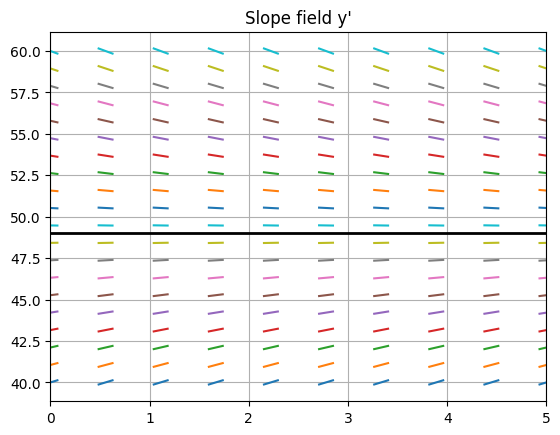

In [4]:
# testes com sympy para encontrar a solução de equilibrio
x = Symbol("x")
str_expr = "9.8 - x/5"
expr = sympify(str_expr)
v = solve(expr, x)[0]

def diff(y):
    return (9.8 - (y/5))

y = np.linspace(40,60, 20)
t = np.linspace(0,5, 10)

eq = [v] * len(t)

for i in t:
    for j in y:
        slope = diff(j)
        domain = np.linspace(i-0.07,i+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(i,j),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.plot(t,eq,  c='k', linewidth=2.0)
plt.xlim(np.min(t), np.max(t))        
plt.title("Slope field y'")
plt.grid(True)
plt.show()

What value of $v$ will cause $dv/dt$ to be zero?

$$ 0 = 9.8 - \frac{v}{5}$$
$$ 9.8 \cdot 5 = v $$ 

$$ v = 49~\textrm{m/s}$$

The constant value $v(t) = 49$ is a solution of equation (5), and it is called an **equilibrium solution**. It is a solution that corresponds to a perfect balance between gravity and drag. It give us the **terminal velocity** of this falling object.

## Fied Mice and Owls

Now let us look at another, quite different example. Consider a
population of field mice that inhabit a certain rural area. In the absence of predators we assume
that the mouse population increases at a rate proportional to the current population. 

If we denote time by $t$ and the mouse population at time $t$ by $p(t)$, the population grouth an be expressed by

$$ \dfrac{p}{t} - rp, $$

where r is the rate constant or grouth rate. Now, supose that r is $0.5/\textrm{month}$, than the terms of equation have the unites mice/month. Suposing that the owls kill $115$ mice per day, they will kill $450$ mice in a month, since the unit of time is month.

$$ \dfrac{p}{t} = 0.5p - 450$$ 

Lets see the direction field

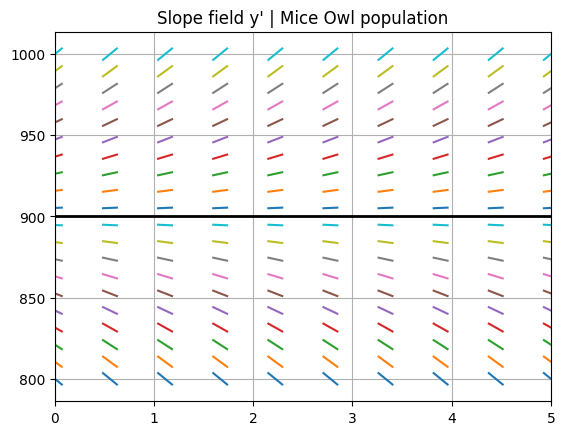

In [5]:
x = Symbol("x")
str_expr = "-450 + 0.5*x"
expr = sympify(str_expr)
v = solve(expr, x)[0]

def diff(y):
    return (-450 + 0.5*y)

y = np.linspace(800,1000, 20)
t = np.linspace(0,5, 10)

eq = [v] * len(t)

for i in t:
    for j in y:
        slope = diff(j)
        domain = np.linspace(i-0.07,i+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(i,j),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.plot(t,eq,  c='k', linewidth=2.0)
plt.xlim(np.min(t), np.max(t))        
plt.title("Slope field y' | Mice Owl population")
plt.grid(True)
plt.show()

## Constructing Mathematical Models

Some steps:

* Identify the independent and dependent variables and assign letters to represent them. Often the independent variable is time
* Choose the units of measurement for each variable. In a sense the choice of units is arbitrary, but some choices may be much more convenient than others. For example, we chose to measure time in seconds for the falling-object problem and in months for the population problem.
* Articulate the basic principle that underlies or governs the problem you are investigating. This may be a widely recognized physical law, such as Newton’s law of motion, or it may be a more speculative assumption that may be based on your own experience or observations. In any case, this step is likely not to be a purely mathematical one, but will require you to be familiar with the field in which the problem originates
* Express the principle or law in step 3 in terms of the variables you chose in step 1. This may be easier said than done. It may require the introduction of physical constants or parameters (such as the drag coefficient in Example 1) and the determination of appropriate values for them. Or it may involve the use of auxiliary or intermediate variables that must then be related to the primary variables.
* If the units agree, then your equation at least is dimensionally consistent, although it may have other shortcomings that this test does not reveal

## Function to construct the slope field

In [6]:
def fun_slope(x1,y1, slope, domain):
    z = slope*(domain-x1)+y1
    return z


def direction_field(symbol: str="", 
                           expression: str ="", 
                           ylim: list=[], 
                           tlim: list=[],
                           problm_title: str=""):


    y = Symbol(symbol)
    str_expr = expression
    expr = sympify(str_expr)
    v = solve(expr, y)
    f = lambdify(y,expr)

    y_array = np.linspace(ylim[0],ylim[1], 20)
    t_array = np.linspace(tlim[0],tlim[1], 10)
    
    plt.figure(dpi=120)
    for i, j in itertools.product(t_array, y_array):
        slope = f(j)
        domain = np.linspace(i-0.07,i+0.07,2)
        plt.plot(domain,fun_slope(i,j, slope, domain),solid_capstyle='projecting',solid_joinstyle='bevel')
    
    for vv in v:
        equilibrium = [vv] * len(t_array)
        plt.plot(t_array,equilibrium,  c='k', linewidth=2.0, label=f"Equilibrium {float(vv)}")
        plt.legend()
    plt.xlim(np.min(t_array), np.max(t_array)) 
    plt.ylim(ylim[0], ylim[1])
    plt.title(f"Slope field y' | {problm_title}")
    plt.grid(True)
    plt.show()


# Direction field plot using quiver
def direction_field_qv(symbol: str="", 
                           expression: str ="", 
                           ylim: list=[], 
                           tlim: list=[],
                           problm_title: str=""):

    t,yy = np.meshgrid(np.arange(tlim[0], tlim[1], .25), np.arange(ylim[0], ylim[1], .25))
    u = np.ones_like(t)

    y = Symbol(symbol)
    str_expr = expression
    expr = sympify(str_expr)
    v = solve(expr, y)
    f = lambdify(y,expr)
    # v = -y * (y - 3) 


    t_array = np.linspace(tlim[0],tlim[1], 10)
    fig, ax = plt.subplots(figsize=(7, 7), dpi=120) 
    ax.quiver(t, yy, u, f(yy), scale_units='xy', scale = 15,color='g')
    for vv in v:
        equilibrium = [vv] * len(t_array)
        ax.plot(t_array,equilibrium,  c='k', linewidth=2.0, label=f"Equilibrium {float(vv)}")
        ax.legend()
    ax.set_xlim(tlim[0], tlim[1]) 
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_title(f"Slope field y' | {problm_title}")
    ax.grid(True)
    # ax.set_aspect('equal')
    # plt.show()
    
## list of expressions

def direction_field2(symbol: str="", 
                           expression: dict =[], 
                           ylim: list=[], 
                           tlim: list=[],
                           problm_title: str=""):


    
    coluns = int(np.floor(len(expression)/2))
    fig, ax = plt.subplots(2,coluns, figsize=(16,6), dpi=120)
    for sx, sy in itertools.product(range(ax.shape[0]), range(ax.shape[1])):
        y = Symbol(symbol)
        str_expr = expression[sx*coluns+sy]
        expr = sympify(str_expr)
        v = solve(expr, y)
        f = lambdify(y,expr)
   
        y_array = np.linspace(ylim[sx*coluns+sy][0],ylim[sx*coluns+sy][1], 20)
        t_array = np.linspace(tlim[0],tlim[1], 10)
    
        for i, j in itertools.product(t_array, y_array):
            slope = f(j)
            domain = np.linspace(i-0.07,i+0.07,2)
            ax[sx, sy].plot(domain,fun_slope(i,j, slope, domain),solid_capstyle='projecting',solid_joinstyle='bevel')

        for vv in v:
            equilibrium = [vv] * len(t_array)
            ax[sx,sy].plot(t_array,equilibrium,  c='k', linewidth=2.0, label=f"Equilibrium {float(vv)}")
            ax[sx,sy].legend()
        ax[sx,sy].set_xlim((np.min(t_array), np.max(t_array))) 
        ax[sx,sy].set_ylim((ylim[sx*coluns+sy][0],ylim[sx*coluns+sy][1]))
        ax[sx,sy].set_title(f"y' = {expression[sx*coluns+sy]}")
        plt.grid(True)
    plt.show()

## Problems
In each of Problems $1$ through $4$, draw a direction field for the given differential equation. Based on the direction field, determine the behavior of $y$ as $t \rightarrow \infty$. If this behavior depends on the initial value of $y$ at $t = 0$, describe the dependency

## 1. 
$$y' = 3-2y$$

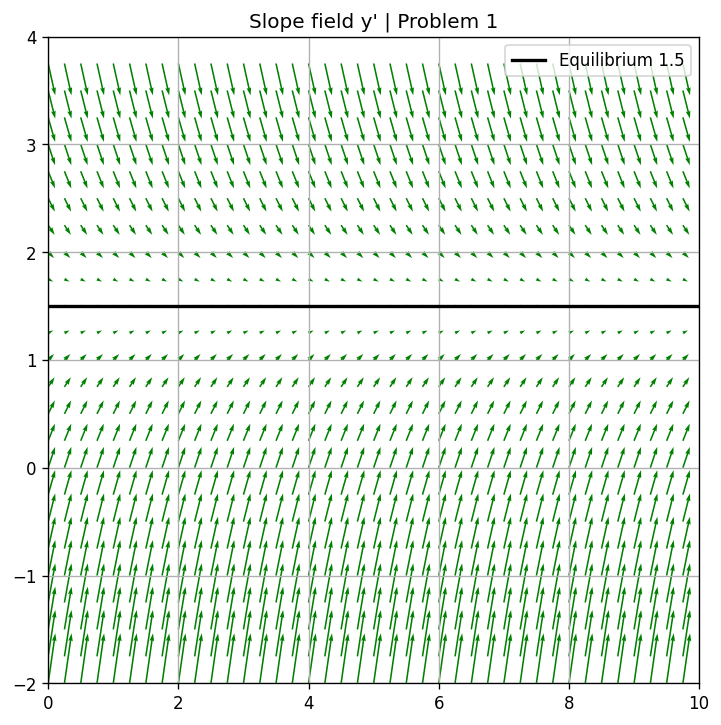

In [7]:
direction_field_qv(symbol="y", expression="3-2*y", ylim=[-2,4], tlim=[0,10], problm_title="Problem 1")

For $y > 1.5$, the inclination is negative and the solution decrease. For $y < 1.5$, the slope inclination is positive and the solution increase. The equilibrium slution tends to  $y(t) = 1.5$.

## 2.
$$y' = 2y-3$$

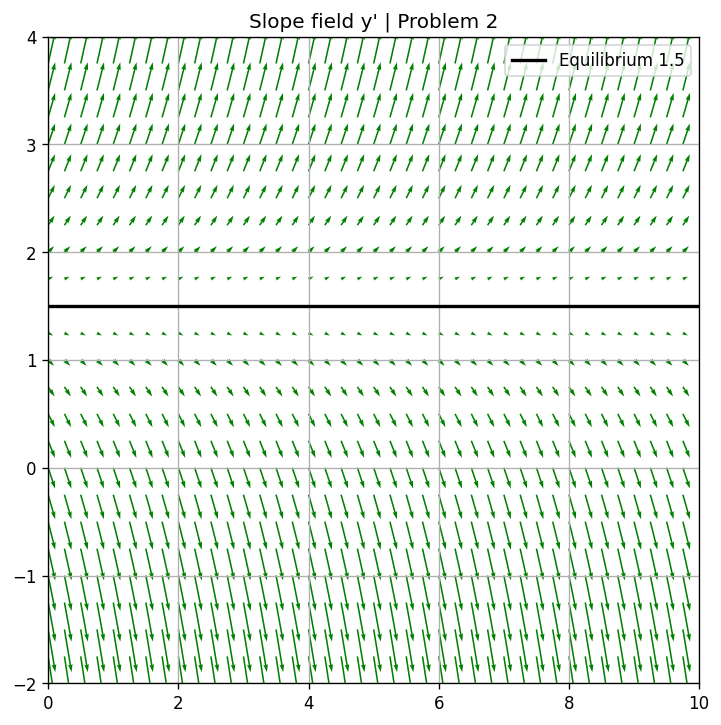

In [8]:
direction_field_qv(symbol="y", expression="2*y-3", ylim=[-2,4], tlim=[0,10], problm_title="Problem 2")

Is the oposite behavior. For $y > 1.5$, the inclination is positive and the solution increase. For $y < 1.5$, the slope inclination is negative and the solution decreases. The equilibrium solution diverges from $y(t) = 1.5$.

## 3.
$$y' = -1-2y $$


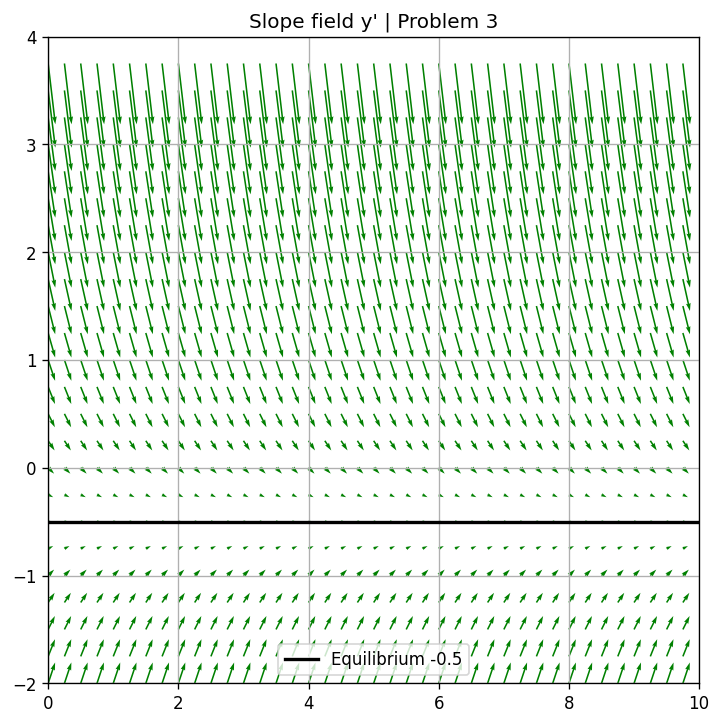

In [9]:
direction_field_qv(symbol="y", expression="-1-2*y", ylim=[-2,4], tlim=[0,10], problm_title="Problem 3")

For $y > -0.5$, the inclination is negative and the solution decrease. For $y < -0.5$, the slope inclination is positive and the solution increase. The equilibrium slution converges to  $y(t) = -0.5$.

## 4. $y' = 1+2y$

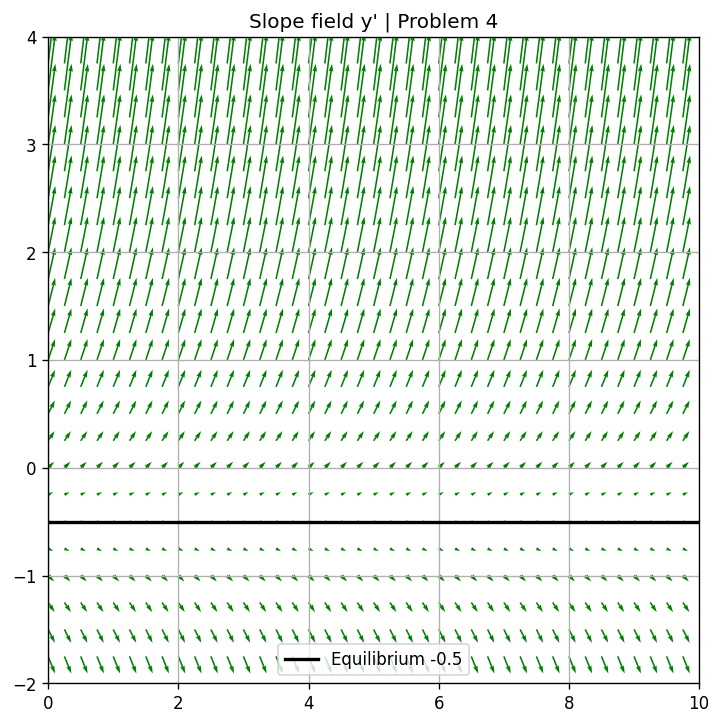

In [10]:
direction_field_qv(symbol="y", expression="1+2*y", ylim=[-2,4], tlim=[0,10], problm_title="Problem 4")

Is the oposite behavior. For $y > -0.5$, the inclination is positive and the solution increase. For $y < -0.5$, the slope inclination is negative and the solution decreases. The equilibrium solution diverges from $y(t) = -0.5$.

***

In each of Problems $5$ and $6$, write down a differential equation of the form $dy/dt = ay + b$ whose solutions have the required behavior as $t \rightarrow \infty$.

## 5. All solutions approach to $y = 2/3$

We need an equation in the for of 

$$ \tag{1} y' = ay+b$$

If $t\rightarrow \infty$, all the solutions goes to $y=2/3$. We have, at equilibrium,

$$y=\frac{2}{3}$$

and

$$y'=0$$

Substitute the values in  in (1),

$$0 = a\left(\frac{2}{3}\right) + b,$$

$$b = -\frac{2}{3}$$

$$ \tag{2} y' = ay - \frac{2}{3}a$$

or

$$ \dfrac{dy}{dt} = a\left( y - \frac{2}{3}\right)$$

Separating the $y$ and $t$ dependency on the equation,

$$ \frac{1}{\left(y-\frac{2}{3}\right)} dy = adt$$

Integrating both sides of equality:

$$\int{\frac{1}{\left(y-\frac{2}{3} \right)}} dy = \int{adt},$$

$$ ln \left(y-\frac{2}{3} \right) = at$$

$$ e^{ ln \left(y-\frac{2}{3} \right)} = e^{at}$$

$$ y-\frac{2}{3} = e^{at}$$

$$ y(t) = e^{at} + \frac{2}{3} $$

For $t\rightarrow \infty $ the solutions approach to $2/3$ if $a = -1$.

$y(t) = \frac{1}{e^{t}} + 2/3$. If $t\rightarrow \infty $, $\frac{1}{e^{t}} \rightarrow 0,$ 

Back to the equation (1)

$$ y' = -1y+\frac{2}{3},$$

or

$$ y' = 2 - 3y$$


## 6. All solutions diverge from $y = 2$

The idea is similar to the previous problem. We know that at equilibrium, 

$$ y = 2 $$

$$ y' = 0$$

$$ 0 = a(2) +b$$

$$b = -2a$$

Substitute in eequation (1)

$$ \dfrac{dy}{dt} = ay - 2a,$$

$$ \frac{dy}{(y-2)} = adt,$$

Integrating on both sides:

$$\int{\frac{1}{\left(y-2 \right)}} dy = \int{adt},$$

$$ln (y-2) = at $$

$$ e^{ln (y-2)} = e^{at} $$

$$ y-2 = e^{at} $$

$$ y(t) = e^{at} + 2 $$

For $t\rightarrow \infty $ the solutions goes to $\infty$ if $a = 1$. Than, back to equation (1):

$$ y' = y-2$$

***

In each of Problems $7$ through $10$, draw a direction field for the given differential equation. Based on the direction field, determine the behavior of y as t → ∞. If this behavior depends on the initial value of $y$ at $t = 0$, describe this dependency. Note that in these problems the equations are not of the form $y' = ay + b$, and the behavior of their solutions is somewhat more complicated than for the equations in the text.

## 7. $y' = y(4-y)$

Let's plot the slope field

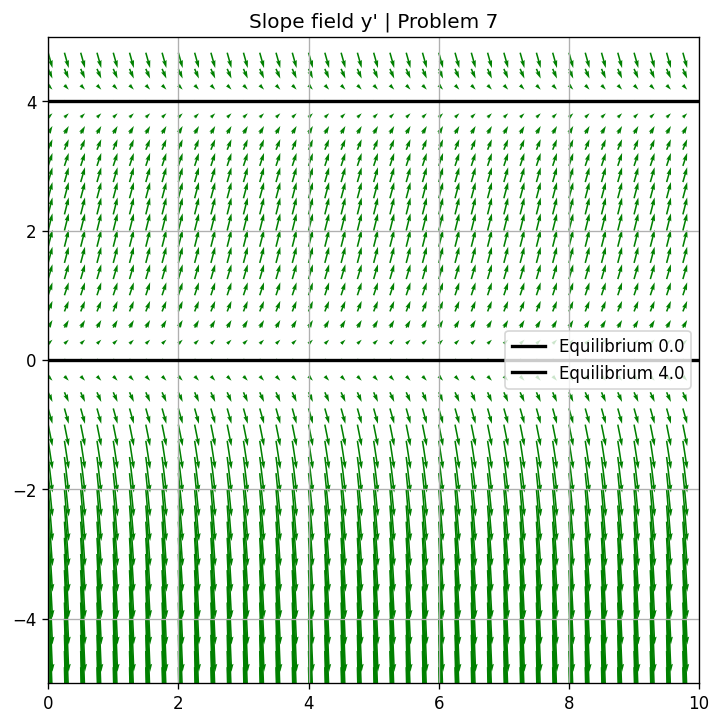

In [11]:
direction_field_qv(symbol="y", expression="4*y - y**2", ylim=[-5,5], tlim=[0,10], problm_title="Problem 7")

For $t\rightarrow \infty$: $y'<0$ if $y<0$ and the solutions diverges from $0$. For $0<y<4$, $y'>0$ and the solution diverges from $0$ and tends to $4$. If $y>4$, $y'<0$ and the solution approach to $4$.

## 8. $y' = -y(5-y)$


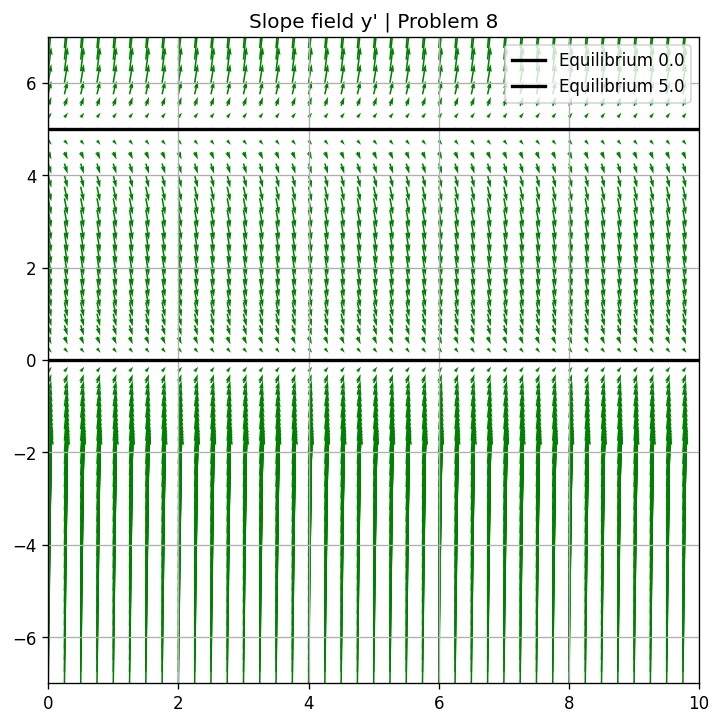

In [12]:
direction_field_qv(symbol="y", expression="-5*y + y**2", ylim=[-7,7], tlim=[0,10], problm_title="Problem 8")

For $t\rightarrow \infty$: $y'<0$ if $0<y<5$, the solutions diverges from $5$ and approach to 0. For $y<0$, $y'>0$ and the solution approach to $0$. If $y>5$, $y'>0$ and the solution diverges from $5$.

## 9. $y' = y^2$

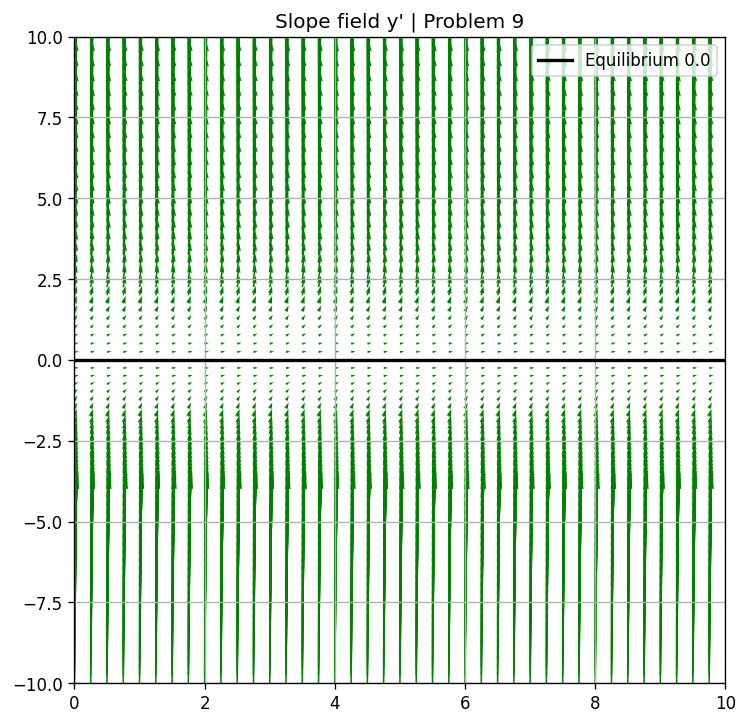

In [13]:
direction_field_qv(symbol="y", expression="y**2", ylim=[-10,10], tlim=[0,10], problm_title="Problem 9")

For $0>y>0$, $y'>0$, but the solutions the solutions diverges from $0$, for $y>0$ and approach to $0$ for $y<0$.

## 10. $y' = y(y-2)^2$

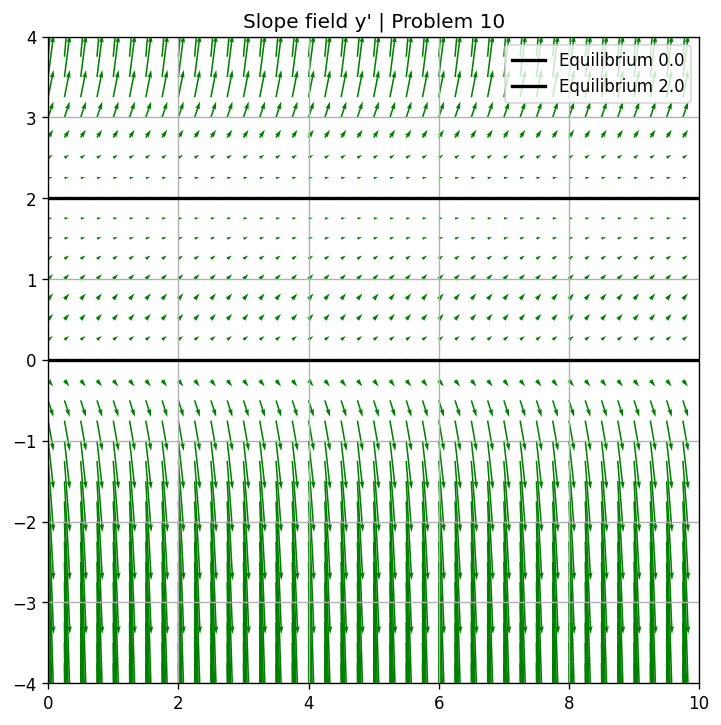

In [14]:
direction_field_qv(symbol="y", expression="y*((y-2)**2)", ylim=[-4,4], tlim=[0,10], problm_title="Problem 10")

We have two equilibrium solutions: $y(t) = 0$ and $y(t) = 2$. If we look in the slope field, $y' > 0$ para $y > 2$; than, the solutions with initial values greather than $2$, diverge from $y(t) = 2$, the inclinations are positive forthe solution with initial values between  $0$ and $2$, and tends to $y(t) = 2$. For $y < 0$, the inclinations are negative, so the solution with initial values lower than $0$, diverges from solution $y(t) = 0$.

***

Consider the following list of differential equations, some of which produced the direction fields shown in Figures $1.1.5$ through $1.1.10$. In each of Problems $11$ through $16$, identify the differential equation that corresponds to the given direction field.

* a. $y' = 2y − 1$
* b. $y'=2+y $
* c. $y'= y−2 $
* d. $y'= y( y + 3) $
* e. $y'= y( y − 3) $
* f. $y'= 1 + 2y $
* g. $y'= −2 − y $
* h. $y' = y( 3 − y)$
* i. $y' = 1 − 2y$
* j. $y' =2−y$

In [15]:
expr_list = ["2*y-1", "2+y", "y-2", "y*(y+3)", "y*(y-3)", "1+2*y", "-2-y", "y*(3-y)", "1-2*y", "2-y"]
yliml=[[-4,4], [-4,4], [-4,4], [-4,4], [-4,4], [-4,4], [-4,4], [-4,4], [-4,4], [-4,4] ]

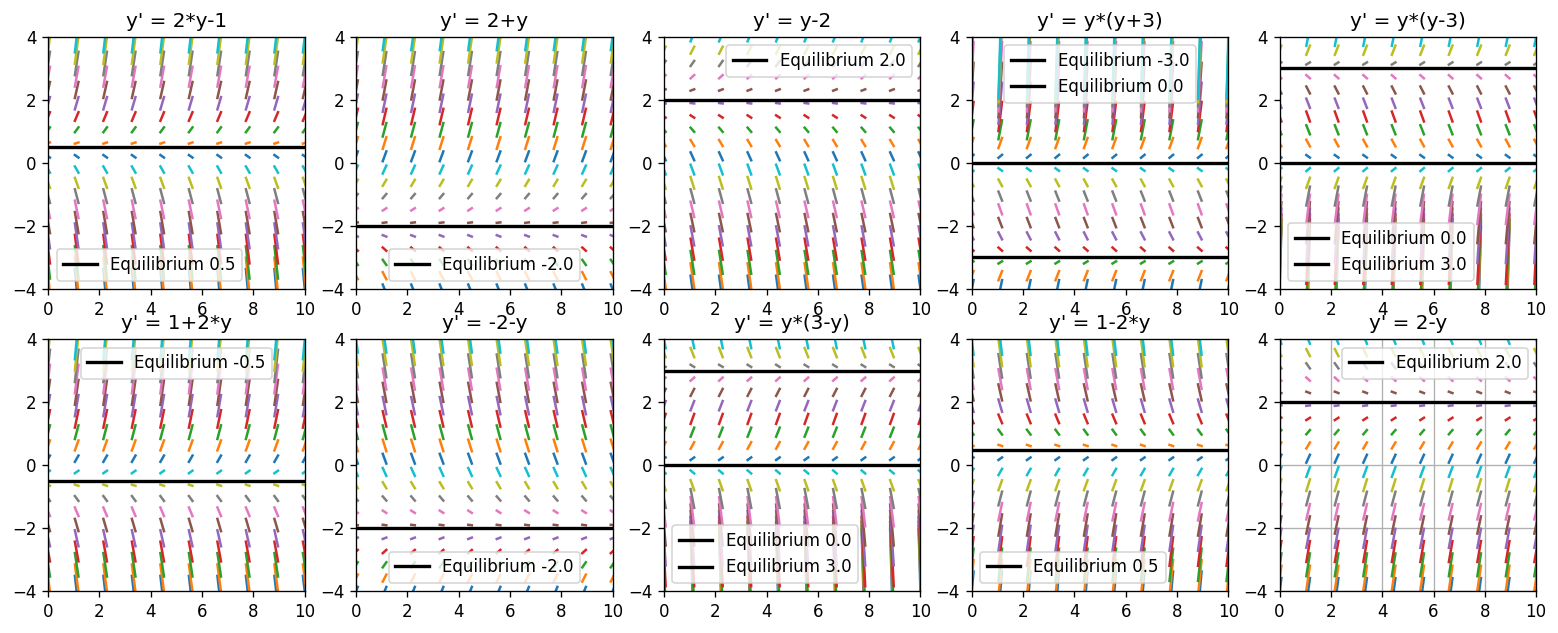

In [16]:
direction_field2(symbol="y", expression=expr_list, ylim=yliml, tlim=[0,10], problm_title="Problem 10")

***
## 17. A pond initially contains $1,000,000$ gal of water and an unknown amount of an undesirable chemical.Water containing $0.01$ grams of this chemical per gallon flows into the pond at a rate of $300\textrm{gal/h}$. The mixture flows out at the same rate, so the amount of water in the pond remains constant. Assume that the chemical is uniformly distributed throughout the pond.

a. Write a differential equation for the amount of chemical in the pond at any time.

b. How much of the chemical will be in the pond after a very long time? Does this limiting amount depend on the amount that was present initially?

c. Write a differential equation for the concentration of the chemical in the pond at time t. Hint: The concentration is $c = a/v = a(t) / 10^6$.


### a.

To solve that we need to think that there is liquid with a certain concentration going in the pound and
another amount going out. Our rate of chemicals in the pound during time cam be written as:

$$ \tag{17.a.1} \dfrac{da(t)}{dt} = a_{in} - a_{out} $$

where $a(t)$ is the concentration in a certain time $t$

$$ \tag{17.a.2} a_{in} = 300~\textrm{gal/h} \cdot 0.01~\textrm{g/gal} = 3~\textrm{g/h}$$

$$ \tag{17.a.3} a_{out} = 300~\textrm{gal/h} \cdot \frac{a(t)}{10^{6}}~\textrm{g/gal} = 3\times10^{-4}a(t)~\textrm{g/h}$$

Substituting 17.a.3 nd 17.a.2 in 17.a.1. The differential equation is:

$$\dfrac{da(t)}{dt} = 3 - 3\times 10^{-4} a(t)$$

With $a(t)$ in $g$ and $t$ in $h$

### b.

At equilibrium:

$$ 0 = 3 - 3\times 10^{-4} C(t) $$

$$ C(t) = \frac{3}{3\times10^{-4}} $$

As $t\rightarrow \infty$,  $C \rightarrow 10^{4}~\textrm{g}$


### c.

If $c = a/v  = a(t)/10^6$, We have


$a = c \cdot 10^{6}$ and the differential equation becomes:

$$\dfrac{dc}{dt} 10^{6} = 3 - 3\times 10^{-4}c \cdot 10^{6}$$

$$\dfrac{dc}{dt} = 3\times10^{-6} - 3\times 10^{-4}c$$



***
## 18. A spherical raindrop evaporates at a rate proportional to its surface area. Write a differential equation for the volume of the raindrop as a function of time.

The sphere surface are is given by $A_s = 4\pi r^2$. We need an equation that is in terms of the Volume of the
sphere. The raindrop evaporates at a rate proportional to the surface area, so the differential equation should belike

$$ \tag{18.1} \dfrac{dV}{dt} = -k(4\pi r^2)$$

where $k$ is a constant relate to the rate of evaporation. Note that the equation 18.1 is in terms of $r$ and we
need to find the rate of Volume in function of time. We know that the Volume of a sphere is proportion to the $r^3$,
so we need to rewrite the equation considering this.

The volume of a sphere is given by $V = \frac{4}{3} \pi r^3$, we have:

$$ \tag{18.2} r^3 = \frac{3}{4\pi} V $$

We want that in terms of $r^2$ to substitute in the sphere's surface equation.

Raising both sides of equation 18.2 to the the power $2/3$, we have:

$$ \tag{18.3} r^2 = \left(\frac{3}{4\pi} V \right)^{2/3} $$

Substitute 18.3 into 18.1


$$ \dfrac{dV}{dt} = -k4\pi \left(\frac{3}{4\pi} V \right)^{2/3} $$

or

$$ \dfrac{dV}{dt} = -k4\pi \left(\frac{3}{4\pi} \right)^{2/3} V^{2/3} $$

We can rewrite the equation as

$$ \dfrac{dV}{dt} = -K V^{2/3} $$

where $K$ is constant, $K=k4\pi \left(\frac{3}{4\pi} \right)^{2/3}.$

And the solution is valid for some $K>0$

***

## 19. Newton’s law of cooling states that the temperature of an object changes at a rate proportional to the difference between the temperature of the object itself and the temperature of its surroundings (the ambient air temperature in most cases). Suppose that the ambient temperature is $70^{\circ}~\textrm{F}$ and that the rate constant is $0.05~(\textrm{min})^{−1}$. Write a differential equation for the temperature of the object at any time. Note that the differential equation is the same whether the temperature of the object is above or below the ambient temperature.


The ambient temperature is $T_A = 70^{\circ}~\textrm{F}$. $T$ is temperature of the object.

The rate of temperature change is proportional to the difference between the temperature of the object and the surroundings so, the equation can be

$$ \dfrac{dT}{dt} = -k(T - T_A)$$

where $k$ is the rate constant, $k = 0.05~(\textrm{min})^{−1}$.

Since we have the surroundings temperature,

$$ \dfrac{dT}{dt} = -0.05(T - 70)$$


***

## 20. A certain drug is being administered intravenously to a hospital patient. Fluid containing $5~\textrm{mg/cm}^3$ of the drug enters the patient's bloodstream at a rate of $100~\textrm{cm}^3/\textrm{h}$. The drug is absorbed by body tissues or otherwise leaves the bloodstream at a rate proportional to the amount present, with a rate constant of $0.4/\textrm{h}$.

a. Assuming that the drug is always uniformly distributed throughout the bloodstream, write a differential equation for the amount of the drug that is present in the bloodstream at any time

b. How much of the drug is present in the bloodstream after a long time?


### a.

The amount of drug in the patient in a certain time is given by the quantity entering the body minus the quantity absorbed by the patient. The quantity absorbed is proportional to the amount inside the body.

Let's say that the quantity $q$ is the amount inside the body, im $mg$.

$$\dfrac{dq}{dt} = q_{in} - k q $$

where k is the rate of absorption, $k = 0.4~(\textrm{h})^{-1}$.

The amount going in is:

$$ q_{in} = \left( 5~\textrm{mg/cm}^3 \cdot 100~\textrm{cm}^3/\textrm{h}  \right), $$

the equation is:

$$\dfrac{dq}{dt} = 500 - 0.4 q $$


### b.

After a long time the equilibrium solution is

$$ 0 = 500-0.4q$$

$$ q \rightarrow 1250~\textrm{mg} $$

Let' see the slope field for this equation

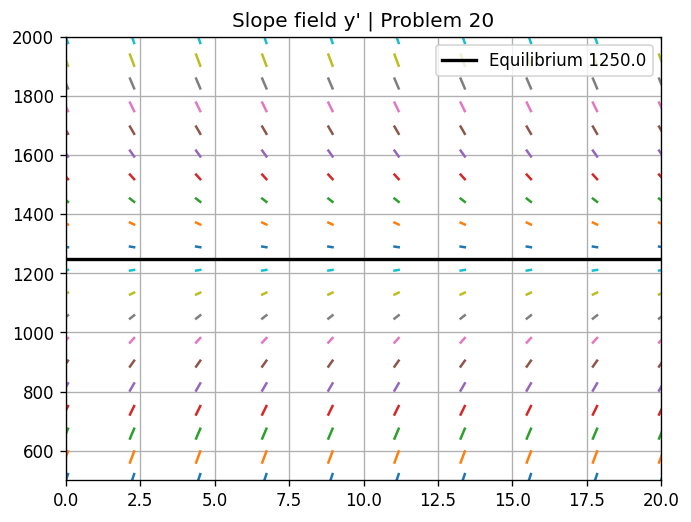

In [17]:
direction_field(symbol="y", expression="500 - 0.4*y", ylim=[500,2000], tlim=[0,20], problm_title="Problem 20")

***

## 21. For small, slowly falling objects, the assumption made in the text that the drag force is proportional to the velocity is a good one. For larger, more rapidly falling objects, it is more accurate to assume that the drag force is proportional to the square of the velocity.

a. Write a differential equation for the velocity of a falling object of mass $m$ if the magnitude of the drag force is proportional to the square of the velocity and its direction is opposite to that of the velocity.

b. Determine the limiting velocity after a long time.

c. If $m = 10~\textrm{kg}$, find the drag coefficient so that the limiting velocity is $49~\textrm{m/s}$

d. Using the data in part c, draw a direction field and compare it with Figure 1.1.3.


### a.

For a falling object, from a free body diagram, we have the gravity force pointing down and the drag force pointing up.

We know that

$$ F = ma$$

$$F = m\dfrac{dv}{dt}$$

The drag force, for large body been proportional to the square of velocity:

$$ F_d = -\gamma v^2 $$

The force acting in the body is:

$$ F = F_g - F-d $$

or

$$ m\dfrac{dv}{dt} = mg - \gamma v^2$$

$$\dfrac{dv}{dt} = g - \frac{\gamma}{m}v^2$$

or with Lagrange's notation

$$ v' = g - \frac{\gamma}{m} v^2$$


### b.

After a long time, the solutions approach to the equilibrium, and we have $y' = 0$.

$$ 0 = g - \frac{\gamma}{m} v^2 $$

$$v^2 = \frac{mg}{\gamma} $$

The final velocity is:

$$ v = \sqrt{\frac{mg}{\gamma}} $$


### c.

if $m = 10~\textrm{km}$ and the limiting velocity is $49~\textrm{m/s}$, from previous equation, we have:

$$ v^2 = mg / \gamma$$

$$ \gamma = mg / v^2 $$

$$ \gamma = \frac{10 \cdot 9.8} {49^2}  = \frac{98}{49^2} = \frac{2}{49}$$

### d.

The slope field will be:

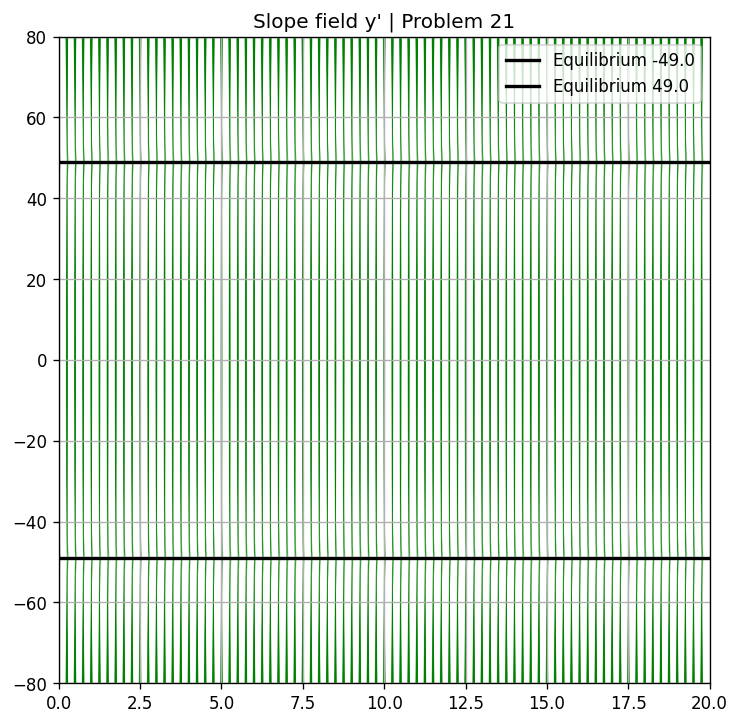

In [18]:
direction_field_qv(symbol="y", expression="9.8 - (1/245)*y^2", ylim=[-80,80], tlim=[0,20], problm_title="Problem 21")

***
In each of Problems $22$ through $25$, draw a direction field for the given differential equation. Based on the direction field, determine the behavior of $y$ as $t \rightarrow \infty$. If this behavior depends on the initial value of $y$ at $t = 0$, describe this dependency. Note that the right-hand sides of these equations depend on $t$ as well as $y$; therefore, their solutions can exhibit more complicated behavior than those in the text

In [19]:
def direction_field2v(symbol: list=[],
                           expression: str ="",
                           ylim: list=[],
                           tlim: list=[],
                           problm_title: str="",
                           plotmap: bool=False):

    ss = symbols(symbol)
    str_expr = expression
    expr = sympify(str_expr)
    f = lambdify(ss,expr)

    y_array = np.linspace(ylim[0],ylim[1], 20)
    t_array = np.linspace(tlim[0],tlim[1], 20)

    matrix = np.zeros((len(t_array), len(y_array)))
    plt.figure(dpi=120)
    for i, j in itertools.product(range(len(t_array)), range(len(y_array))):
        slope = f(t_array[i],y_array[j])
        domain = np.linspace(t_array[i]-0.07,t_array[i]+0.07,2)
        matrix[i, j] = slope
        plt.plot(domain,fun_slope(t_array[i],y_array[j], slope, domain),solid_capstyle='projecting',solid_joinstyle='bevel')

    plt.xlim(np.min(t_array), np.max(t_array))
    plt.ylim(ylim[0], ylim[1])
    plt.title(f"Slope field y' | {problm_title}")
    plt.grid(True)

    if plotmap:
        plt.figure(dpi=120)
        plt.pcolormesh(np.transpose(matrix), cmap="seismic")

    plt.show()


# Direction field plot using quiver
def direction_field2v_qv(symbol: str="", 
                           expression: str ="", 
                           ylim: list=[], 
                           tlim: list=[],
                           problm_title: str="",
                           plotmap: bool=False):

    t,yy = np.meshgrid(np.arange(tlim[0], tlim[1], .25), np.arange(ylim[0], ylim[1], .25))
    u = np.ones_like(t)

    ss = symbols(symbol)
    str_expr = expression
    expr = sympify(str_expr)
    f = lambdify(ss,expr)
    # v = -y * (y - 3) 


    t_array = np.linspace(tlim[0],tlim[1], 10)
    fig, ax = plt.subplots(figsize=(7, 7), dpi=120) 
    ax.quiver(t, yy, u, f(t,yy), scale_units='xy',scale = 15,color='g')
    # for vv in v:
    #     equilibrium = [vv] * len(t_array)
    #     ax.plot(t_array,equilibrium,  c='k', linewidth=2.0, label=f"Equilibrium {float(vv)}")
    #     ax.legend()
    ax.set_xlim(tlim[0], tlim[1]) 
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_title(f"Slope field y' | {problm_title}")
    ax.grid(True)
    # ax.set_aspect('equal')
    # plt.show()
    

## 22. $y' = -2 + t -y $

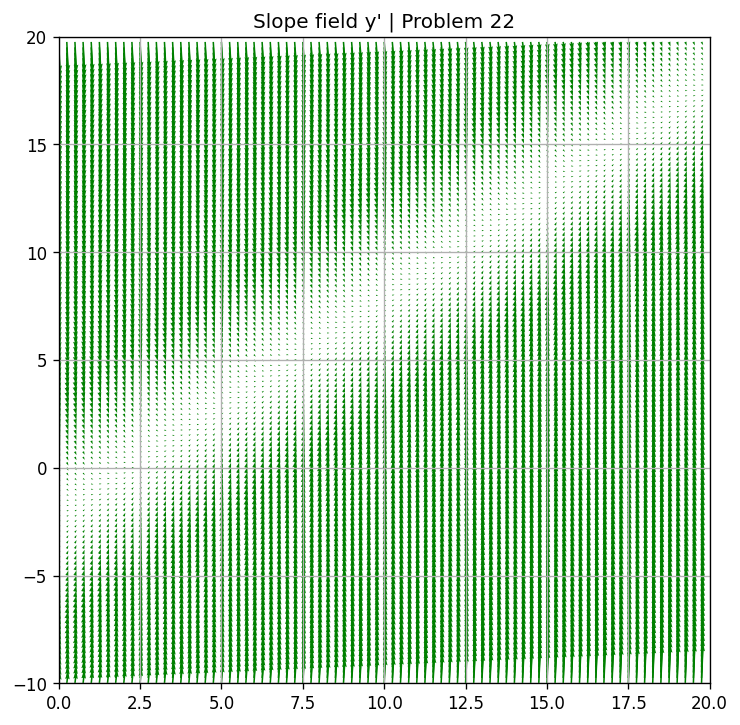

In [20]:
direction_field2v_qv(symbol=["t", "y"], expression="-2 + t - y", ylim=[-10,20], tlim=[0,20], problm_title="Problem 22")

The solutions have an asymptotic behavior

***
## 23. $y' = e^{-t} + y $

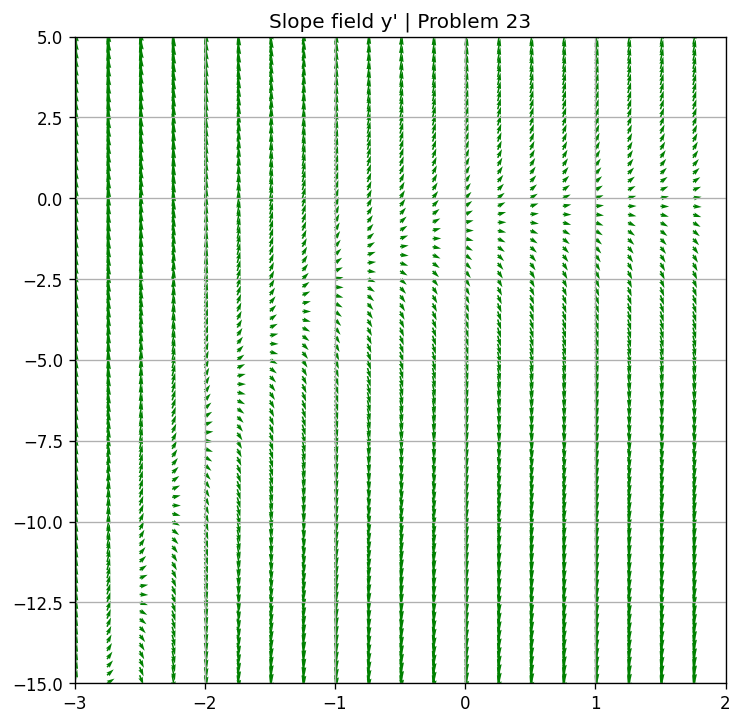

In [21]:
direction_field2v_qv(symbol=["t", "y"], expression="exp(-t) + y", ylim=[-15,5], tlim=[-3,2], problm_title="Problem 23")

***
## 24. $y' = 3\sin t + 1 + y$

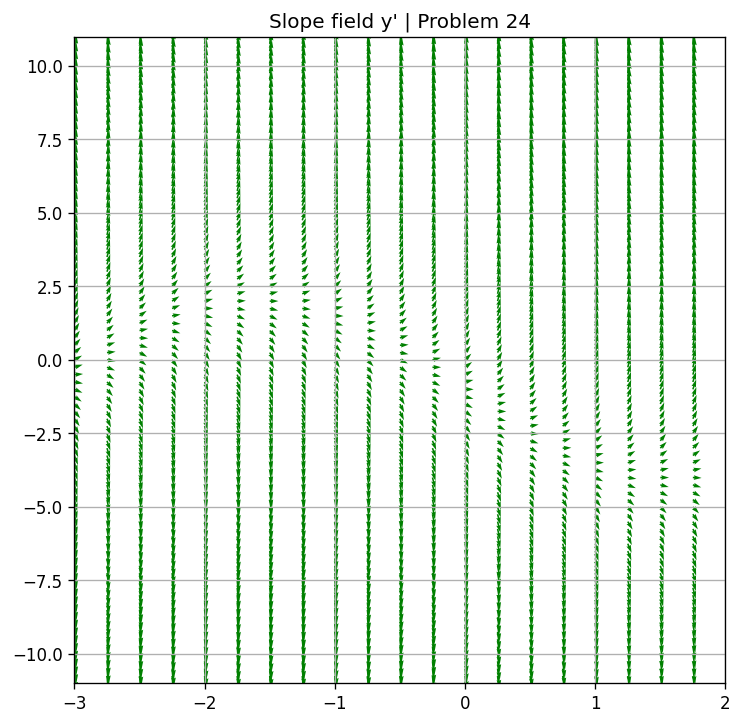

In [22]:
direction_field2v_qv(symbol=["t", "y"], expression="3*sin(t)+ 1 + y", ylim=[-11,11], tlim=[-3,2], problm_title="Problem 24")

***

## 25. $y' = -\frac{2t+y}{2y} $


<lambdifygenerated-24>:2: RuntimeWarning: divide by zero encountered in divide
  return (1/2)*(-2*t - y)/y
<lambdifygenerated-24>:2: RuntimeWarning: invalid value encountered in divide
  return (1/2)*(-2*t - y)/y


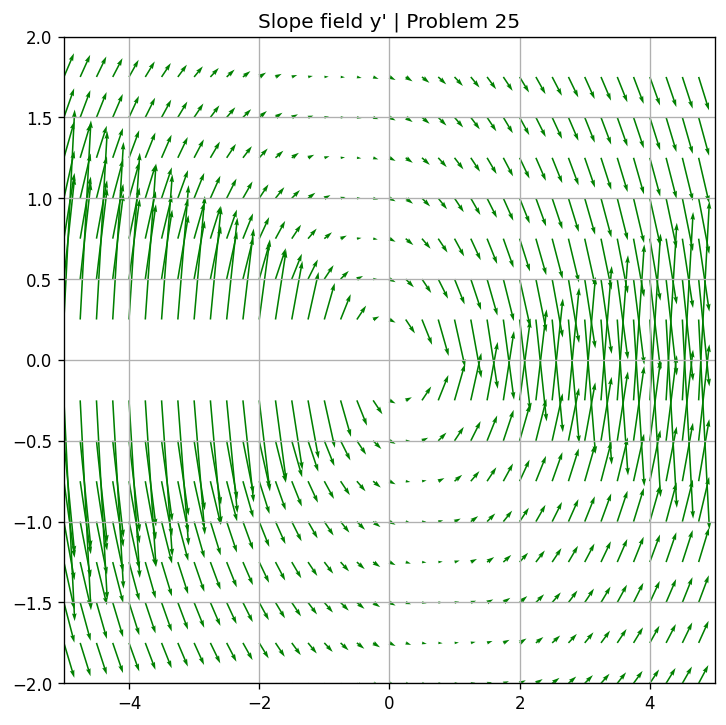

In [23]:
direction_field2v_qv(symbol=["t", "y"], expression="-(2*t + y)*(2*y)**(-1)", ylim=[-2,2], tlim=[-5,5], problm_title="Problem 25", plotmap=False)


# test plot slope fields with sageMath

# import sys
# from sage.all import *

# x,y = var('x y')
# grr = plot_slope_field(-(2*x + y)*(2*y)**(-1), (x,-5,5), (y,-2,2))
# figu = plt.figure() # you may set the size here
# grr.matplotlib('a.svg', figure=figu)
# figu.show()

In [24]:
import matplotlib.cm as cm
from sympy.abc import x
from sympy.plotting import plot
def direction_field_wConst(symbol: str="",
                           expression: str ="",
                           ylim: list=[],
                           tlim: list=[],
                           problm_title: str="",
                           constants: list=[]):


    yy = Symbol(symbol)
    str_expr = expression
    expr = sympify(str_expr)
    v = solve(expr, yy)
    f = lambdify(yy,expr)

    # solve equation
    fs, gs = symbols('f g', cls=Function)
    # fs(x).diff()
    diffeq = Eq(fs(x).diff(x), sympify(str_expr.replace("y", "f(x)")))

    dds = dsolve(diffeq, fs(x))

    y_array = np.linspace(ylim[0],ylim[1], 20)
    t_array = np.linspace(tlim[0],tlim[1], 10)

    plt.figure(dpi=120)
    for i, j in itertools.product(t_array, y_array):
        slope = f(j)
        domain = np.linspace(i-0.07,i+0.07,2)
        plt.plot(domain,fun_slope(i,j, slope, domain),solid_capstyle='projecting',solid_joinstyle='bevel')

    for vv in v:
        equilibrium = [vv] * len(t_array)
        plt.plot(t_array,equilibrium,  c='b', linewidth=2.0, label=f"Equilibrium {float(vv)}")
        plt.legend()

    colors = cm.gnuplot(np.linspace(0, 1, len(constants)))
    for cc, col in zip(constants, colors):
        solut = dds.subs({Symbol('C1'): cc})
        y_res = solut.args[1]
        fx = lambdify(x, y_res)
        ds = fx(t_array)
        plt.plot(t_array,ds, color=col, linewidth=2.0, label=f"C = {float(cc)}")
        plt.legend()

    plt.xlim(np.min(t_array), np.max(t_array))
    plt.ylim(ylim[0], ylim[1])
    plt.title(f"Slope field y' | {problm_title}")
    plt.grid(True)
    plt.show()

***

# 1.2 Solutions of Some Differential Equations

The equations seen in the previous chapter are of the general form

$$ \dfrac{dy}{dt} = ay - b, $$

where $a$ and $b$ are given constants.

## Example 1 | Field Mice and Owls (continued)

We start with the equation

$$ \dfrac{dp}{dt} = 0.5p - 450, $$

Which describes the interaction of a population of mice and owls seen in the previous section.

To solve the equation, we need to find functions $p(t)$ that, when substituted into the equation, reduce
it to an obvious identity. One way to proceed is to rewrite the equation in the form

$$\dfrac{dp}{dt} = \frac{p-900}{2},$$

or, if $p\neq 900$,


$$\frac{dp/dt}{p-900} = \frac{1}{2},$$

by the chainrule, the left-hand side is the derivative of $ln|p-900|$ with respct to $t$, so we have

$$\dfrac{d}{dt}ln |p-900| = \frac{1}{2}$$

Integrating boths sides:

$$ln|p-900| = \frac{t}{2} + C$$

taking the exponential of both sides:

$$|p-900| = e^{t/2 + C} = e^C e^{t/2}$$

or

$$p-900 = \pm e^{t/2 + C} = e^C e^{t/2}$$

$$\tag{11} p = 900 +  ce^{t/2}$$

where $c = \pm e^C$, also an arbitrary constant.Note that the constant function $p = 900$ is also a solution and that it is contained in the expression if we allow c to take the value zero. SEe bellow a graph for several values oc $c$:

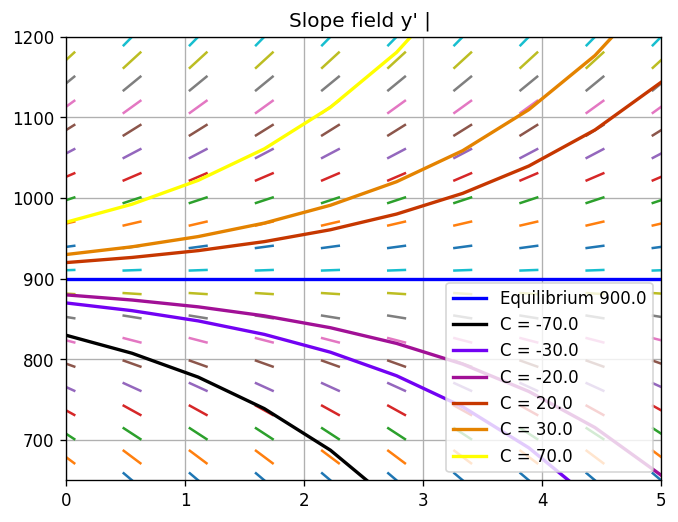

In [25]:
direction_field_wConst(symbol="y", expression="0.5*y - 450",
                       ylim=[650,1200], tlim=[0,5], problm_title="",
                       constants=[-70, -30, -20, 20, 30, 70])



This is typical of what happens when you solve a differential equation. The solution process involves an integration, which brings with it an arbitrary constant, whose possible values generate an infinite family of solutions.

Frequently, we want to focus our attention on a single member of the infinite family of solutions by specifying the value of the arbitrary constant. Most often, we do this indirectly by specifying instead a point that must lie on the graph of the solution. For example, to determine the constant $c$ in equation (11), we could require that the population have a given value at a certain time, such as the value $850$ at time $t = 0$. In other words, the graph of the solution must pass through the point $(0, 850)$. Symbolically, we can express this condition as

$$\tag{12} p(0) = 850.$$

Substituting $t=0$ and $p=850$ into (11), we obtain

$$ 850 = 900 + c$$

$c = 50$, and by inserting this value into equation (11), we obtain the desired solution

$$ p= 900 - 50 e^{t/2} $$


The additional condition (12) that we used to determine c is an example of an **initial condition**. The differential equation (4) together with the initial condition (12) forms an **initial value problem**.

Now consider a more general problem

$$\tag{14} \dfrac{dy}{dt} ay - b$$

and the initial condition

$$y(O) = y_0$$


We solve this in the same way as the example:

$$ \frac{dy/dt}{y - \frac{b}{a}} = a.$$

by integrating both sides:

$$ln \left | y(t) - \frac{b}{a} \right| = at +C $$

Taking the exponential if both sides:

$$\tag{17} y(t) = \frac{b}{a}  ce^{at} $$

Observe that $c = 0$ corresponds to the equilibrium solution $y(t) = b/a$. Finallym the initial condition (14) requires tat $c = y_0 - (b/a)$, so the solution of the initial value problem (3), (14) is

$$y(t) = \frac{b}{a} + \left( y_0 - \frac{b}{a} \right) e^{at} $$

For $a \neq 0$ the expression (17) contains all possible solutions of equation (3) and is called the **general solution**. The geometric representation of the general solution (17) is an infinite family of curves called **integral curves**.

If we want the solution of a falling object problem, we must identify $a$ with $−γ/m$ and $b$ with $−g$. Observe that assuming $γ > 0$ and $m > 0$ implies that $a < 0$ and $b < 0$. Making these substitutions in the solution (18), we obtain

$$\tag{20} v(t) - \frac{mg}{\gamma} + \left( v_0 - \frac{mg}{\gamma} \right) e^{\gamma t/m} $$

## Example 2 | A falling object (continued)

Supose that, as in previous section, we consider a falling object of mass $m = 10$ kg and grad coefficient $\gamma = 2$ kg/s. Then, the equation of motion becomes:

$$ \dfrac{dv}{dt} = 9.8-\frac{v}{5} $$

The initial condition:

$$\tag{22} v(0) = 0 $$

$$ \frac{dv/dt}{v - 49} = -\frac{1}{5} $$

$$ ln|v(t) - 49| = 0\frac{t}{5} + C $$

$$\tag{25} v(t) = 49 + ce^{-t/5} $$

To determine the particular value of c that corresponds to the initial condition (22), we substitute t = 0 and v$ = 0$ into equation (25), with the result that $c = −49$. Then the solution of the initial value problem is

$$ v(t) = 49(1-e^{-t/5})$$

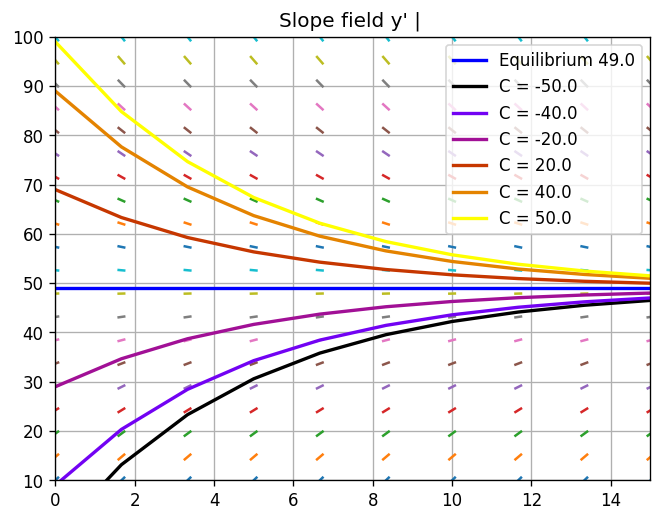

In [26]:
direction_field_wConst(symbol="y", expression="9.8 - y/5",
                       ylim=[10,100], tlim=[0,15], problm_title="",
                       constants=[-50, -40, -20, 20, 40, 50])

To find the velocity of the object when it hits the ground, we need to know the time at which impact occurs. In other words, we need to determine how long it takes the object to fall $300$ m. To do this, we note that the distance $x$ the object has fallen is related to its velocity $v$ by the differential equation $v = dx/dt$, or

$$ \dfrac{dv}{dt} = 49(1-e^{-t/5})$$

By integratin both sides, we have

$$\tag{28} x = 49t + 245e^{-t/5} + k $$

where $k$ is an arbitrary constant of integration. The object starts to fall when $t = 0$, so we know that $x = 0$ when $t = 0$. From equation (28) it follows that $k = −245$, so the distance the object has fallen at time $t$ is given by

$$ 49T + 245e^{-T/5} - 245 = 300 $$

The value of T satisfying equation (30) can be approximated by a numerical process using
a calculator or other computational tool, with the result that $T \approx 10.51$ s. At this time, the
corresponding velocity $v_T$ is found from equation (26) to be $v_T \approx 43.01~\textrm{m/s}$


***

**We should always remember that the ultimate test of any mathematical model is whether its predictions agree with observations or experimental results**

***
# Problems 1.2

## 1. Solve each of the following initial value problems and plot the solutions for several values of $y_0$. Then describe in a few words how the solutions resemble, and differ from, each other.

### a. $ dy/dt = -y+5, y(0) = y_0$

The equation is equal to
$$ \dfrac{dy}{dt} = -1(y-5)$$

or

$$ \frac{dy/dt}{y-5} = -1$$


Integrating both sides with respect to $t$:

$$ ln|y(t) - 5| = -t +C $$

taking the exponential of both sides:

$$ e^{(ln|y(t) - 5|)} = e^{(-t+C)} $$

$$ y(t) - 5 = e^{-t}e^C $$

$$ y(t) = 5 + ce^{-t} $$

where $c = e^{C}$
***
Como $y(0) - y_0$,

$$ y_0 = 5 + ce^{0} $$

$$ y_0 = 5 + c $$

$$ c = y_0 - 5 $$

And the general solution will be:

$$ y(t) = 5 + (y_0 - 5)e^{-t} $$

Let's see the graph for this equation:

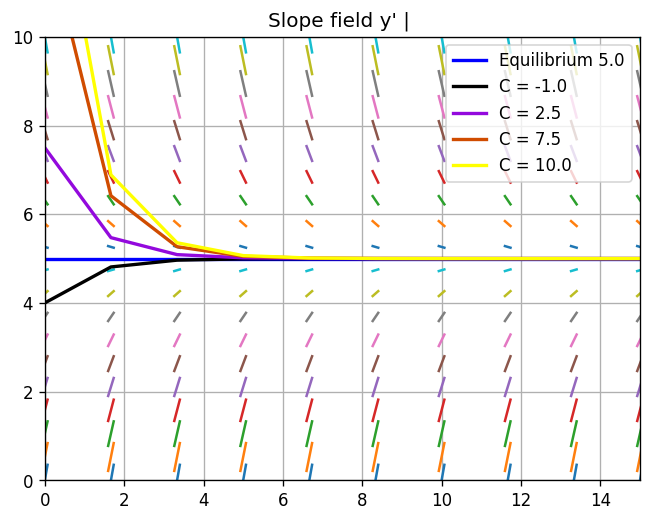

In [27]:
direction_field_wConst(symbol="y", expression="-y + 5",
                       ylim=[0,10], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

The equilibrium solution is $y=5$.

***

### b. $ dy/dt = -2y+5, y(0) = y_0$

The equation is equal to
$$ \dfrac{dy}{dt} = -2(y-5/2)$$

or

$$ \frac{dy/dt}{\left( y-\frac{5}{2} \right)} = -2$$


Integrating both sides with respect to $t$:

$$ ln\left|y(t) - \frac{5}{2} \right| = -2t +C $$


taking the exponential of both sides:

$$ e^{(ln\left|y(t) - \frac{5}{2} \right|)} = e^{(-2t+C)} $$

$$ y(t) - \frac{5}{2} = e^{-2t}e^C $$

$$ y(t) = \frac{5}{2} + ce^{-2t} $$

where $c = e^{C}$
***
Como $y(0) - y_0$,

$$ y_0 = \frac{5}{2} + ce^{0} $$

$$ y_0 = \frac{5}{2} + c $$

$$ c = y_0 - \frac{5}{2} $$

And the general solution will be:

$$ y(t) = \frac{5}{2}  + \left(y_0 - \frac{5}{2} \right)e^{-2t} $$

Let's see the graph for this equation:

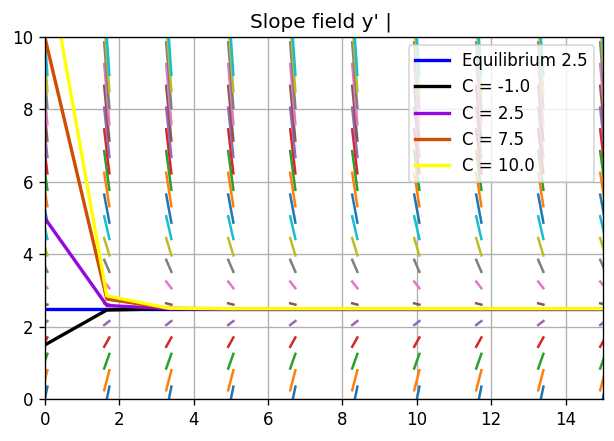

In [26]:
direction_field_wConst(symbol="y", expression="-2*y + 5",
                       ylim=[0,10], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

The equilibrium solution is $y=5/2$.

***

### c. $ dy/dt = -2y + 10 $, $y(0) = y_0$

The equation is equal to
$$ \dfrac{dy}{dt} = -2(y-5)$$

or

$$ \frac{dy/dt}{y-5} = -2$$


Integrating both sides with respect to $t$:

$$ ln|y(t) - 5| = -2t +C $$

taking the exponential of both sides:

$$ e^{(ln|y(t) - 5|)} = e^{(-2t+C)} $$

$$ y(t) - 5 = e^{-2t}e^C $$

$$ y(t) = 5 + ce^{-2t} $$

where $c = e^{C}$
***
Como $y(0) - y_0$,

$$ y_0 = 5 + ce^{0} $$

$$ y_0 = 5 + c $$

$$ c = y_0 - 5 $$

And the general solution will be:

$$ y(t) = 5 + (y_0 - 5)e^{-2t} $$

Let's see the graph for this equation:

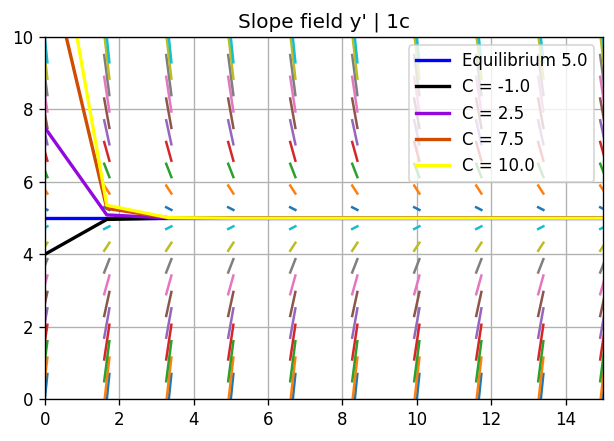

In [27]:
direction_field_wConst(symbol="y", expression="-2*y + 10",
                       ylim=[0,10], tlim=[0,15], problm_title="1c",
                       constants=[-1, 2.5, 7.5, 10])

The equilibrium solution is $y=5$.

The solution approaches to equilibrium faster in (b) and (c) than in (a).

***

## 2. Follow the instructions for Problem 1 for the following initial-value problems:

### a. $ dy/dt = y-5$, $y(0) = y_0$

The equation is equal to
$$ \dfrac{dy}{dt} = 1(y-5)$$

or

$$ \frac{dy/dt}{y-5} = 1$$


Integrating both sides with respect to $t$:

$$ ln|y(t) - 5| = t +C $$

taking the exponential of both sides:

$$ e^{(ln|y(t) - 5|)} = e^{(t+C)} $$

$$ y(t) - 5 = e^{t}e^C $$

$$ y(t) = 5 + ce^{t} $$

where $c = e^{C}$
***
Como $y(0) - y_0$,

$$ y_0 = 5 + ce^{0} $$

$$ y_0 = 5 + c $$

$$ c = y_0 - 5 $$

And the general solution will be:

$$ y(t) = 5 + (y_0 - 5)e^{t} $$

Let's see the graph for this equation:

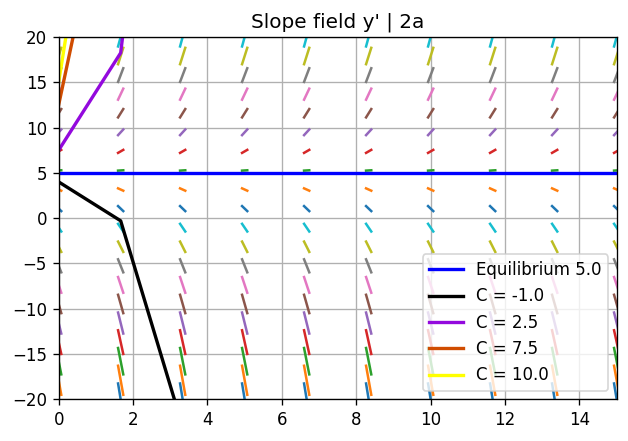

In [28]:
direction_field_wConst(symbol="y", expression="y - 5",
                       ylim=[-20,20], tlim=[0,15], problm_title="2a",
                       constants=[-1, 2.5, 7.5, 10])


The solutions diverges from $y=5$

***
### b. $ dy/dt = 2y-5$, $y(0) = y_0$

The equation is equal to
$$ \dfrac{dy}{dt} = 2(y-5/2)$$

or

$$ \frac{dy/dt}{\left( y-\frac{5}{2} \right)} = 2$$


Integrating both sides with respect to $t$:

$$ ln\left|y(t) - \frac{5}{2} \right| = 2t +C $$


taking the exponential of both sides:

$$ e^{(ln\left|y(t) - \frac{5}{2} \right|)} = e^{(2t+C)} $$

$$ y(t) - \frac{5}{2} = e^{2t}e^C $$

$$ y(t) = \frac{5}{2} + ce^{2t} $$

where $c = e^{C}$
***
Como $y(0) = y_0$,

$$ y_0 = \frac{5}{2} + ce^{0} $$

$$ y_0 = \frac{5}{2} + c $$

$$ c = y_0 - \frac{5}{2} $$

And the general solution will be:

$$ y(t) = \frac{5}{2}  + \left(y_0 - \frac{5}{2} \right)e^{2t} $$

Let's see the graph for this equation:

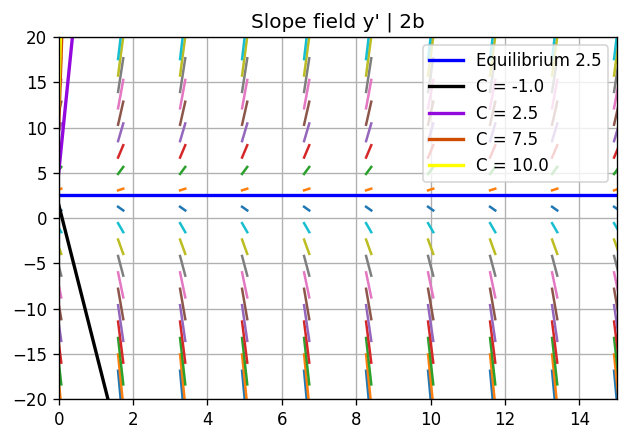

In [29]:
direction_field_wConst(symbol="y", expression="2*y - 5",
                       ylim=[-20,20], tlim=[0,15], problm_title="2b",
                       constants=[-1, 2.5, 7.5, 10])


The solutions diverges from $y=5/2$


***
### c. $ dy/dt = 2y-10$, $y(0) = y_0$

The equation is equal to
$$ \dfrac{dy}{dt} = 2(y-5)$$

or

$$ \frac{dy/dt}{y-5} = 2$$


Integrating both sides with respect to $t$:

$$ ln|y(t) - 5| = 2t +C $$

taking the exponential of both sides:

$$ e^{(ln|y(t) - 5|)} = e^{(2t+C)} $$

$$ y(t) - 5 = e^{2t}e^C $$

$$ y(t) = 5 + ce^{2t} $$

where $c = e^{C}$
***
Como $y(0) = y_0$,

$$ y_0 = 5 + ce^{0} $$

$$ y_0 = 5 + c $$

$$ c = y_0 - 5 $$

And the general solution will be:

$$ y(t) = 5 + (y_0 - 5)e^{2t} $$

Let's see the graph for this equation:


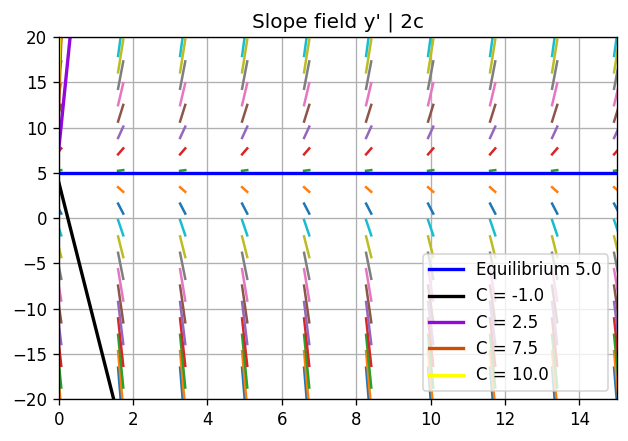

In [30]:
direction_field_wConst(symbol="y", expression="2*y - 10",
                       ylim=[-20,20], tlim=[0,15], problm_title="2c",
                       constants=[-1, 2.5, 7.5, 10])


The solutions diverges from $y=5$

The solution diverges from equilibrium faster in (b) and (c) than in (a).


***


## 3. Consider the differential equation

$$ \dfrac{dy}{dt} = -ay + b $$

where both a and b are positive numbers.

### a. Find the general solution of the differential equation.

The equation is equal to
$$ \dfrac{dy}{dt} = -a\left( y-\frac{b}{a} \right)$$

or

$$ \frac{dy/dt}{\left( y-\frac{b}{a} \right)} = -a$$


Integrating both sides with respect to $t$:

$$ ln\left| y(t)-\frac{b}{a} \right| = -at +C $$

taking the exponential of both sides:

$$ e^{(ln\left| y(t)-\frac{b}{a} \right|)} = e^{(-at+C)} $$

$$ y(t)-\frac{b}{a} = e^{-at}e^C $$

$$ y(t) = \frac{b}{a} + ce^{-at} $$

where $c = e^{C}$
***
$y(0) = y_0$,

$$ y_0 = \frac{b}{a} + ce^{0} $$

$$ y_0 = \frac{b}{a} + c $$

$$ c = y_0 - \frac{b}{a} $$

And the general solution will be:

$$ y(t) = \frac{b}{a} + \left( y_0-\frac{b}{a} \right)e^{-at} $$

***
### b. Sketch the solution for several different initial conditions.

if a increases

Equilibrium is lower and is approached more rapidly.

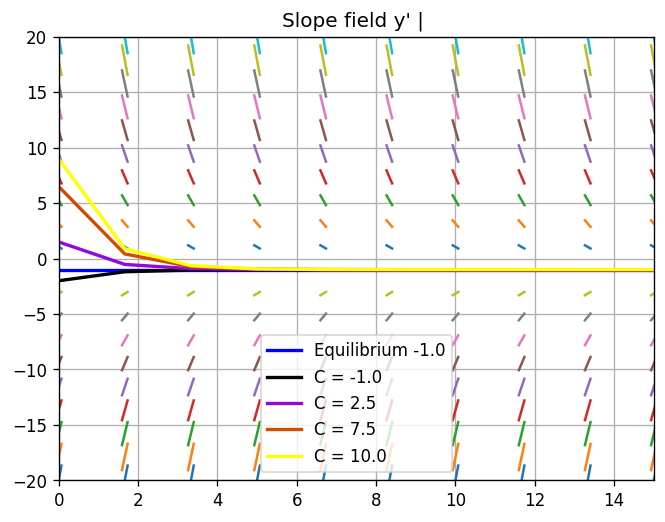

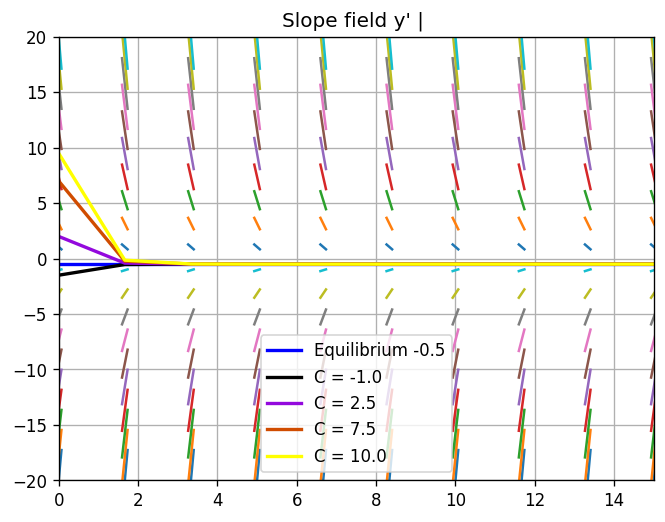

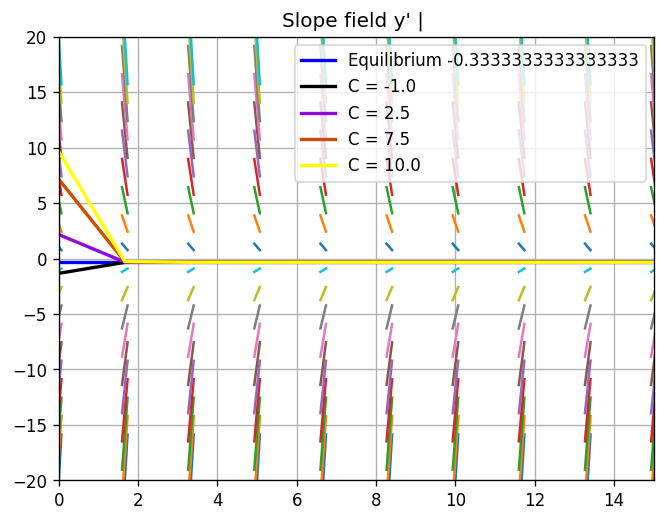

In [28]:

direction_field_wConst(symbol="y", expression="-y - 1",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])


direction_field_wConst(symbol="y", expression="-2*y - 1",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

direction_field_wConst(symbol="y", expression="-3*y - 1",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

***

if b increases

Equilibrium is higher.

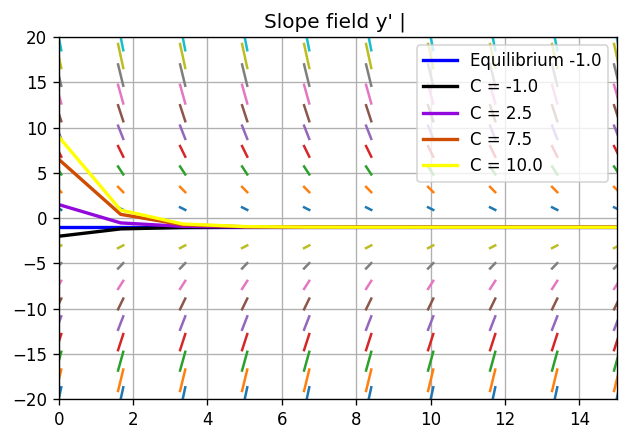

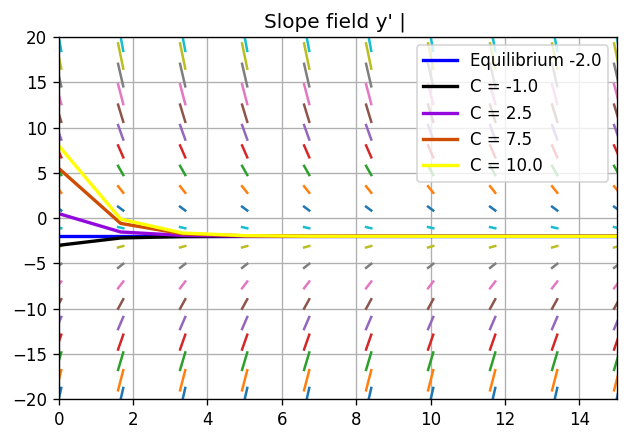

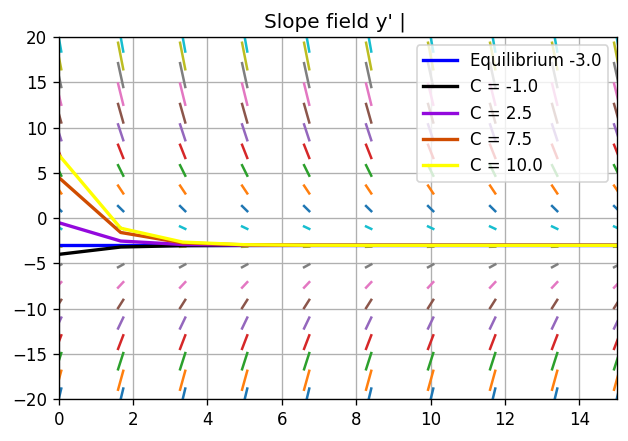

In [32]:

direction_field_wConst(symbol="y", expression="-y - 1",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])


direction_field_wConst(symbol="y", expression="-y - 2",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

direction_field_wConst(symbol="y", expression="-y - 3",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

***

if the ratio remains the same


Equilibrium remains the same and is approached more rapidly.

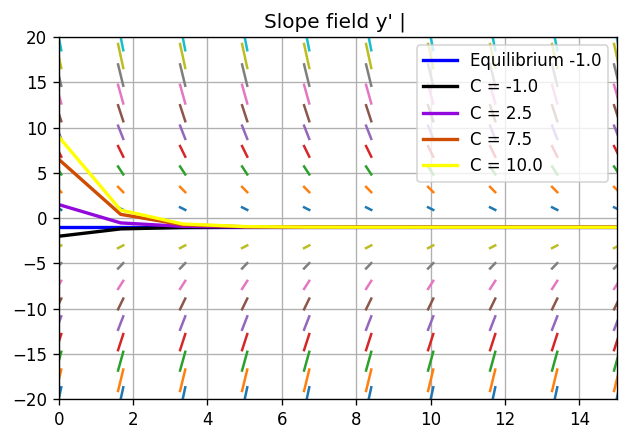

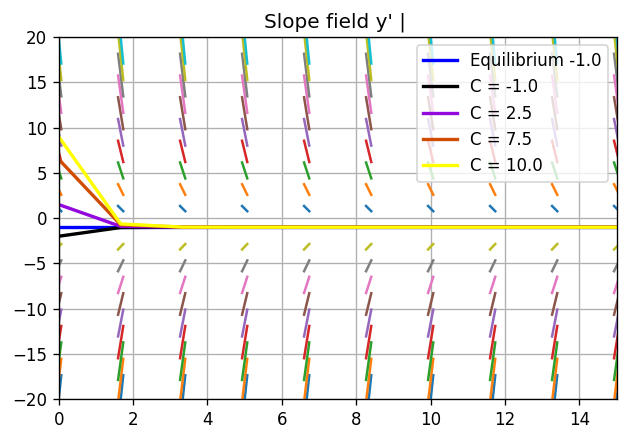

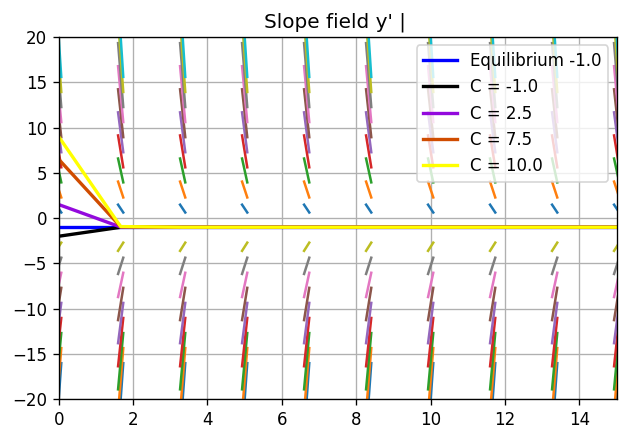

In [33]:

direction_field_wConst(symbol="y", expression="-y - 1",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])


direction_field_wConst(symbol="y", expression="-2*y - 2",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])

direction_field_wConst(symbol="y", expression="-3*y - 3",
                       ylim=[-20,20], tlim=[0,15], problm_title="",
                       constants=[-1, 2.5, 7.5, 10])


***
***
## 4. Consider the differential equation

$$ \dfrac{dy}{dt} = ay - b $$

***
### a. Find the equilibrium solution $y_e$

The equilibirium is when $\dfrac{dy}{dt} \rightarrow 0 $, then 


$$ 0 = ay-b$$

$$-ay = b$$

$$ y = \frac{b}{a}$$


The equilibrium solution $y_e$ is $y_e = \frac{b}{a}$

***

### b. Let $Y(t) = y-y_e$; thus $Y(t)$ is the deviation from the equilibrium solution. Find the differential equation satisfied by $Y(t)$

The differential equation will be something like this:

$$ \dfrac{dY}{dt} = \dfrac{dy}{dt} - \dfrac{dy_e}{dt} $$

$y_e = \frac{b}{a}$ is a constant, so $\dfrac{dy_e}{dt} = 0$

$$ \dfrac{dY}{dt} = \dfrac{dy}{dt}$$

$$ \dfrac{dY}{dt} = ay - b$$


$$ \dfrac{dY}{dt} = a\left(y - \frac{b}{a}\right)$$

or 

$$ \dfrac{dY}{dt} = a Y(t)$$

***
***
## 5. **Undetermined Coefficients.** Here is an alternative way to solve the equation
$$ \dfrac{dy}{dy} = ay - b$$

### a. Solve the simpler equation
$$ \dfrac{dy}{dt} = ay $$

We have:

$$ \frac{dy/dt}{y} = a $$

$$\frac{dy}{y} = a dt $$

Integrating both sides of equation with respect to t:

$$ ln|y| = at + C $$

$$ e^{(ln|y|)} = e^{(at + C)} $$

$$ y = e^{at}e^{C} $$

$$ y = y_1(t) = ce^{at}$$

where $c = e^{C}$, wich is an arbitrary constant

***

### b. Observe that the only difference between equations (31) and (32) is the constant −b in equation (31). Therefore, it may seem reasonable to assume that the solutions of these two equations also differ only by a constant. Test this assumption by trying to find a constant k such that $y = y_1 ( t) + k$ is a solution of equation (31).

Assuming that $y = y_1 ( t) + k$ is a solution of $ \dfrac{dy}{dy} = ay - b$, if we plug y into the equation, we have:

$$ \dfrac{d(y_1 + k)}{dt} = a(y_1 + k) - b $$

or

$$ \dfrac{d(ce^{at} + k)}{dt} = a(ce^{at} + k) - b $$

$$ \dfrac{d(ce^{at})}{dt} + \dfrac{dk}{dt} = ace^{at} + ak - b $$

$$ ace^{at} = ace^{at} + ak - b $$

$$ k = \frac{b}{a} $$

And the solution is

$$ y = ce^{at} + \frac{b}{a} $$

***
### c. Compare your solution from part b with the solution given in the text in equation (17). 

Is the same solution as the equation 17

***
***

## 6. Use the method of Problem 5 to solve the equation

$$ \dfrac{dy}{dt} = -ay +b $$

first step is to solve a simpler equation:

$$\dfrac{dy}{dt} = -ay $$

That is:

$$ \frac{dy}{y} = -a dt $$

$$ ln|y| = -at + C $$

$$ y_1 = ce^{-at} $$

Lets say that the that the solution only differ by a constant $k$, such that $y = y_1(t) + k $ is a solution.

Substitute into equation 1:

$$ \dfrac{d(ce^{-at} + k)}{dt} = -a(ce^{-at}+k) + b $$

$$ -ace^{-at} = -ace^{-at} -ak+b $$

$$ k = \frac{b}{a} $$

And the solution of the equation is:

$$ y = ce^{-at} + \frac{b}{a} $$


***
***
## 7. The field mouse population in Example 1 satisfies the differential equation

$$ \dfrac{dp}{dt} = \frac{p}{2} - 450$$

### a. Find the time at which the population becomes extinct if $p(0) = 850$.

the solution for this equation is 

$$ p = 900 + ce^{t/2} $$

At $t = 0$ the population is $850$, so

$$ p(0) = 900 + c e^{0} = 850 $$

$$ c = -50 $$

than

$$ p(t) = 900 - 50e^{t/2} $$

to be extintict, $p(t) = 0 $

$$ p(t) = 900 - 50 e^{t/2} $$

$$ -50e^{t/2} = -900 $$

$$ e^{t/2} = \frac{900}{50} $$

$$e^{t/2} = 18 $$

$$ ln|e^{t/2}| = ln18$$

$$ t = 2ln 18$$

***

### b. Find the time of extinction if $p(0) = p_0$ , where $0 < p_0 < 900$.

The solution is

$$ p = 900 + ce^{t/2} $$

$$ p(0) = 900 + ce^{0}  = p_0$$

$$ c = p_0 - 900 $$

Then

$$ p(t) = 900 + (p_0 - 900)e^{t/2} $$

$$ p(0) = 900 + (p_0 - 900)e^{0}  = p_0$$

$$ e^{t/2} = \frac{900}{900-p_0} $$

$$ t = 2ln\left| \frac{900}{900-p_0}\right| $$

***

### c. Find the initial population p0 if the population is to become extinct in 1 year.

$$ t = 2ln\left| \frac{900}{900-p_0}\right| $$

$$ e^{t/2} = \frac{900}{900-p_0} $$

$$ p(t) = -\frac{900}{e^{t/2}} - 900 $$

After one year, or $12$ months:

$$ p = 897.76 $$ 


In [34]:
def p0(t):
    return (900/(-np.exp(t/2))) + 900 

pup = p0(12)
print(pup)

897.7691230410003


## 8. The falling object in Example 2 satisfies the initial value problem

$$ \dfrac{dv}{dt} = 9.8 - \frac{v}{5}$$

### a. Find the time that must elapse for the object to reach $98\%$ of its limiting velocity.

From example 2 we know that the equation for the velocity is

$$ v(t)  = 49(1 - e^{-t/5}) $$

but first we need to find the terminal velocity, that is when let say we have $t\rightarrow \infty$, so the terminal velocity is the limit of previous equation when $t$ goes to infinity

$$\lim_{t \to \infty} v(x)  = \lim_{t \to \infty}  49(1 - e^{-t/5})$$

$$ v_t = 49 $$

Than the time to reach $98\%$ of its limiting velocity ($0.98~49 = 48.02~\textrm{m/s} $) is

$$ 48.02 = 49(1 - e^{-t/5}) $$

$$ 48.02 - 49= - 49e^{-t/5} $$

$$t = 5\ln\left| \frac{49}{1.02} \right| \approx 19.36~\textrm{s} $$

***

### b.  How far does the object fall in the time found in part a?

We know that the velocity is $\dfrac{dx}{dt}$, so from previous part,


$$\dfrac{dx}{dt} = 49(1-e^{-t/5}) $$

integrating both sides

$$ x = 49t + 245e^{-t/5} +C$$

where C is an integration arbitrary constant. At $t=0$, $v=0$, and we can find the constant

$$ x(0) = 49(0) + 245e^{0} + C $$

$$ C = -245 $$

The displacement equation is:

$$x(t) = 49t + 245e^{-t/5} -245 $$

$$ x(19.36) \approx 708.74 \textrm{m} $$



In [29]:
def howFar(t):
    return 49*t + 245*np.exp(-t/5) - 245

howFar(19.36)

708.74009012195

## 9. Consider the falling object of mass $10~\textrm{kg}$ in Example 2, but assume now that the drag force is proportional to the square of the velocity.

### a. If the limiting velocity is $49~\textrm{m/s}$ (the same as in Example 2), show that the equation of motion can be written as

$$ \dfrac{dv}{dt} = \frac{1}{245}(49^2 - v^2) $$

We have $m = 10~\textrm{kg}$ and drag force, $F_d = \gamma v^2$. The equation of movement is constructed based on toe total forces acting in the object:

$$ F_t = F_g - F_d $$

$$ ma = mg - \gamma v^2 $$

$$ m\dfrac{dv}{dt} = mg - \gamma v^2 $$

$$ \dfrac{dv}{dt} = g - \frac{\gamma}{m} v^2 $$

The limiting velocity is when $\dfrac{dv}{dt} = 0 $

$$ g - \frac{\gamma}{m} v^2 = 0 $$

$$ v^2 = \frac{gm}{\gamma} $$

Since the limiting velocity is $49~\textrm{m/s}$, the drag coefficient is

$$ \gamma = \frac{gm}{49^2} $$

Substituing in the displacement equation

$$ \dfrac{dv}{dt} = g - \frac{g}{49^2}v^2 $$

$$ \dfrac{dv}{dt} = \frac{g}{49^2}(49^2 - v^2) $$

$$ \dfrac{dv}{dt} = \frac{9.8}{49^2}(49^2 - v^2) $$

Since $\frac{49^2}{9.8} = 244.9999999 \approx 245$, the equation of motion can be writen as

$$ \dfrac{dv}{dt} = \frac{1}{245}(49^2 - v^2) $$

***

### b. If $v( 0) = 0$, find an expression for $v( t)$ at any time.

We have the expression

$$ \dfrac{dv}{dt} = \frac{1}{245}(49^2 - v^2) $$

$$ \frac{\dfrac{dv}{dt}}{(49^2 - v^2)}  = \frac{1}{245} $$

$$ \dfrac{dv}{(49^2 - v^2)}  = \dfrac{dt}{245} $$

Integrating both sides

$$ \int\dfrac{dv}{(49^2 - v^2)}  = \int\dfrac{dt}{245} $$

Start solving the left side integral, that can be writen as:

$$\frac{1}{49^2} \int\dfrac{dv}{\left(1 - \frac{v^2}{49^2}\right)} $$

solving by substitution, $u = \frac{v}{49}$,

$$ \dfrac{du}{dv} = \frac{1}{49} $$

$$ dv = 49 du $$

back to the integral:


$$\frac{49}{49^2} \int\dfrac{du}{(1 - u^2)} $$

***
Parentesis to solve this second integralm taht can be solved bu trigonometric subsitution:
$$ \int\dfrac{du}{(1 - u^2)} $$

Lets say taht $u = tanh \theta $ (Choosing $tanh$ instead of the tangent is because few steps further, we will be stucked in a problem that can be solved simply substituing an proprety of hiperbolic trigonometric functions...)

$$ \dfrac{du}{d\theta} = sech^2 \theta $$

$$ du = sech^2 \theta d\theta $$

substituing...

$$ \int\dfrac{sech^2 \theta d\theta}{1 - tanh^2 \theta} $$

Here we use the proprety of hiperbolic trigonometric functions:

$$ tanh^2 \theta = 1-sech^2 \theta \to sech^2 \theta = 1 - tanh^2 \theta $$

$$ \int\dfrac{sech^2 \theta d\theta}{sech^2 \theta} = \int d\theta = \theta $$

Since $ u = tanh \theta $, $\theta = tanh^{-1} u $.

$$ \therefore$$

$$ \int\dfrac{du}{(1 - u^2)} = tanh^{-1} u + C$$

***

Now, 

$$\frac{49}{49^2} \int\dfrac{du}{(1 - u^2)}  = \frac{1}{49} tanh^{-1} u + C = \frac{1}{49} tanh^{-1} \frac{v}{49} + C $$

Going back to the differential equation:

$$ \frac{1}{49} tanh^{-1} \frac{v}{49} = \frac{t}{245} + C $$

Multiplying by $245 $

$$ 5tanh^{-1} \frac{v}{49} = t + C $$

$$ v(t) = 49 tanh(\frac{t + C}{5}) $$


$$v(0) = 49\left( \frac{tanh(0) + tanh(C/5)}{1+tanh(0)tanh(C/5)}  \right)  = 0$$

$$ 49tanh(C/5) = 0 $$

$$ C = tanh^{-1}(0) = 0$$

$$\therefore$$

$$ v(t) = 49~\textrm{tanh}(\frac{t}{5}) $$

***

### c. Plot your solution from part b and the solution (26) from Example 2 on the same axes.

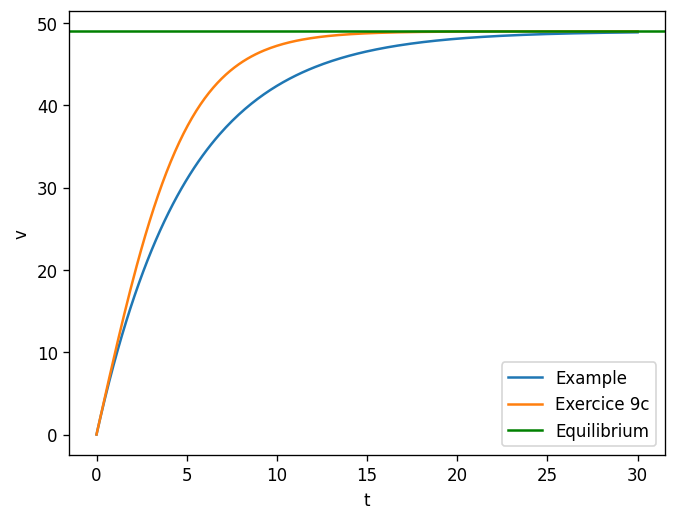

In [30]:
# Ploting the function

def funcExemple2(t):
    return 49*(1 - np.exp(-t/5))

def funcExercice9(t):
    return 49*(np.tanh(t/5))

t = np.linspace(0,30, 256)

plt.figure(dpi=120)

plt.plot(t,funcExemple2(t), label='Example')
plt.plot(t,funcExercice9(t), label='Exercice 9c')
plt.axhline(y=49, color='green', label='Equilibrium')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()

### d. Based on your plots in part c, compare the effect of a quadratic drag force with that of a linear drag force.

A quadratic drag force makes the object aproach faster to the terminal velocity.

***

### e. Find the distance $x(t)$ that the object falls in time t.

The distance is given by $v(t) = \dfrac{dx}{dt}$,

$$\dfrac{dx}{dt} = 49 \textrm{tanh} \left(\frac{t}{5}\right) $$

$$ dx = 49 \textrm{tanh} \left(\frac{t}{5}\right) dt $$

integrating both sides

$$ x(t) = 49 \cdot 5 \ln~\textrm{cosh} \left(\frac{t}{5} \right) + C $$ 

Since $x(0) = 0 $,

$$ x(0) = 245 \ln~\textrm{cosh} \left(0 \right) + C $$

$$ x(0) = C = 0  \to C = 0$$

$$\therefore$$

$$ x(t) = 245 \ln~\textrm{cosh} \left(\frac{t}{5} \right) $$ 


***

### f. Find the time T it takes the object to fall $300~\textrm{m}$

$$ 300 = 245 \ln~\textrm{cosh} \left(\frac{t}{5} \right) $$

$$ \frac{300}{245} = \ln~\textrm{cosh} \left(\frac{t}{5} \right) $$

$$ e^{60/45} = textrm{cosh} \left(\frac{t}{5} \right) $$

$$ textrm{cosh} \left(e^{60/45} \right)  = \frac{t}{5} $$

$$ t = 5\textrm{cosh} \left(e^{60/45} \right)  \approx 9.48~\textrm{s} $$

In [37]:
t_300 = 5* (np.arccosh(np.exp(60/49)))
t_300

9.476532054094651

## 10. A radioactive material, such as the isotope thorium-234, disintegrates at a rate proportional to the amount currently present. If Q(t) is the amount present at time t, then $dQ/dt = −r Q$, where $r > 0$ is the decay rate.

### a. If 100 mg of thorium-234 decays to $82.04~\textrm{mg}$ in 1 week, determine the decay rate r.

Lets find the solution of the equation

$$ \dfrac{dQ}{dt} = -rQ $$

Divide both sides by Q:

$$ \frac{\dfrac{dQ}{dt}}{Q} = -r $$

The left side can be weriten, by the chain rule, as 

$$ \dfrac{d}{dt} ln|Q| = -r $$

Integrate both sides with respect to t:

$$ ln|Q| = -rt + C$$

$$ e^{ln|Q|} = e^{ -rt + C} $$

$$ Q = e^{-rt}e^{C} $$

Let $ c = e^{C} $

$$ Q(t) = ce^{-rt} $$

If at $t = 0$, que amount of material is $Q_0$, the constant c will be:

$$ Q(0) = ce^{-r(0)} = Q_0 \to c = Q_0$$

$$ \therefore $$ 

$$ Q(t) = Q_0e^{-rt} $$


For the decay rate, consider a initial amount of $100~\textrm{mg}$ of material (Here we can mantain the unitis as it is, since we dont have different quantities; and 1 week is 7 days, in order to get the decay rate in $~\textrm{day}^{-1}$):

$$ 82.04 = 100e^{-7r} $$

$$e^{-7r} = 0.8204 $$

$$ -7r = \ln(0.8204)$$

$$\therefore$$

$$r = -\frac{\ln(0.8204)}{7} \approx 0.02828~\textrm{day}^{-1}$$

In [38]:
-1/7*np.log(0.8204)

0.028280464683415926

***

### b. Find an expression for the amount of thorium-234 present at any time t.

The amount of thorium-234 present at any time t is given by:

Considering the initial amount of $100~\textrm{mg}$,

$$ Q(t) = Q_0 e^{-0.02828t}$$
***

### c. Find the time required for the thorium-234 to decay to onehalf its original amount

In this case we have:

$$ \frac{Q_0}{2} = Q_0e^{-0.02828t} $$

$$\frac{1}{2} = e^{-0.02828t} $$

$$ t = -\frac{\ln(0.5)}{0.02828} \approx 24.5~\textrm{day}$$


In [39]:
-np.log(0.5) / 0.02828

24.510154899573738

## 11. The "half-life" of a radioactive material is the time required for an amount of this material to decay to one-half its original value. Show that for any radioactive material that decays according to the equation $Q' = −r Q$, the half-life $\tau$ and the decay rate $r$ satisfy the equation $r\tau = \ln~2$

Considering the equation from previous problem:

$$ Q(t) = Q_0 e^{-rt} $$

$$ \frac{Q_{\tau}}{Q_0} =  e^{-r\tau} $$

At half-life $ Q_{\tau} = \frac{Q_0}{2} $,

$$ \frac{Q_{0}}{2Q_0} =  e^{-r\tau} $$

$$ \ln~\frac{1}{2} = -r\tau $$

$$ \ln~1 - \ln~2 = -r\tau $$

$$\therefore $$ 

$$r\tau = \ln~2$$

***
## 12. According to Newton’s law of cooling (see Problem 19 of Section 1.1), the temperature $u(t)$ of an object satisfies the differential equation

$$ \dfrac{du}{dt} = -k(u-T) $$

## where $T$ is the constant ambient temperature and $k$ is a positive constant. Suppose that the initial temperature of the object is $u(0) = u0$.

### a. Find the temperature of the object at any time


$$ \dfrac{du}{dt} = -k(u-T) $$

$$ u' = -k(u-T) $$

Divide both sides by $(u-T) $

$$\frac{u'}{(u-T)} = -k $$

that can be written as

$$ \dfrac{d}{dt} (\ln|u-T|) = -k $$

Integrating both sides with respect to $t$

$$\ln|u-T| = -kt + C $$

$$u-T = e^{(-kt + C)} $$

$$ u = ce^{-kt} + T $$

We know thaty  $u(0) = u_0$,

$$ u(0) = ce^{-k(0)} + T = u_0 $$

$$ u_0 = c+T $$

$\therefore$$

$$ u(t) = T + (u_0-T)e^{-kt} $$

Where $(u_0-T)$ is the initial differente temperature.

***

### b. Let $\tau$ be the time at which the initial temperature difference $u0 − T$ has been reduced by half. Find the relation between $k$ and $\tau$.

We have

$$ u(t) = T + (u_0-T)e^{-kt} $$

$$ u(\tau) - T = (u_0-T)e^{-k\tau} $$

When the initial temperature difference is reduced by half, $ u(\tau) - T  =  \frac{u_0 - T}{2}$,

$$ \frac{u_0 - T}{2} = (u_0-T)e^{-k\tau} $$

$$ \frac{1}{2} = e^{-k\tau} $$

$$ \ln~\frac{1}{2} = -k\tau $$

The relation will be:

$$ k\tau = \ln~2 $$


***
## 13. Consider an electric circuit containing a capacitor, resistor, and battery; see Figure below. The charge $Q(t)$ on the capacitor satisfies the equation

$$ R\dfrac{dQ}{dt} + \frac{Q}{C} = V $$

## where $R$ is the resistance, $C$ is the capacitance, and $V$ is the constant voltage supplied by the battery.

![The electric circuit of Problem 13.](./figures/problem1-3_13aCapacitor.png)

### a. If $Q(0) = 0$, find $Q(t)$ at any time $t$, and sketch the graph of $Q$ versus $t$.

$$ R\dfrac{dQ}{dt} + \frac{Q}{C} = V $$

$$ R\dfrac{dQ}{dt} = V - \frac{Q}{C} $$

Divide both sides by $R$

$$ \dfrac{dQ}{dt} = \frac{V}{R} - \frac{Q}{RC} $$

$$ \dfrac{dQ}{dt} = \frac{CV - Q}{RC} $$

$$ \dfrac{dQ}{dt} = -\frac{1}{RC}(Q - CV) $$

$$ \frac{Q'}{(Q - CV)} =  -\frac{1}{RC} $$

$$ \dfrac{d}{dt}\ln~|Q - CV| = -\frac{1}{RC} $$

Integrating both sides with respect to $t$

$$ \ln~|Q - CV| = -\frac{1}{RC}t + C $$

$$ Q - CV = A e^{-\frac{t}{RC}} $$

$$ Q(t) = CV + A e^{-\frac{t}{RC}} $$

At $t = 0$, $Q(0) = 0 $,

$$ Q(0) = CV + A e^{-\frac{0}{RC}} $$

$$ A = -CV$$

$$\therefore $$

$$ Q(t) = CV(1- e^{-\frac{t}{RC}}) $$

The sketch is the graph bellow

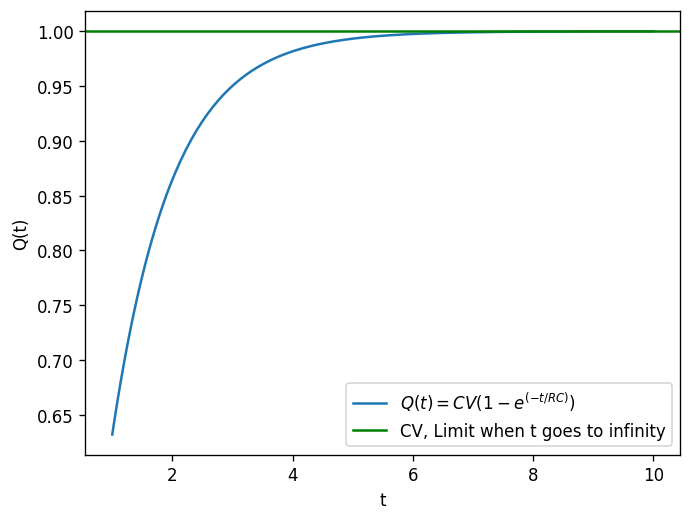

In [31]:
# 13 charge capacitor

def chargeCapacitor(R,C,V,t):
    charge = C*V*(1-np.exp(-(t/(R*C))))

    return (charge)

t = np.linspace(1,10,200)

qQ = chargeCapacitor(1,1,1,t)

plt.figure(dpi=120)

plt.plot(t,qQ, label='$Q(t) = CV(1-e^{(-t/RC)})$')
plt.axhline(y=1, color='green', label='CV, Limit when t goes to infinity')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.legend()

### b. Find the limiting value $Q_L$ that $Q(t)$ approaches after a long time. 

$$ Q(t) = CV(1-e^{-\frac{t}{RC}}) $$

$$ Q_L = \lim_{t\to \infty}~Q(t) = \lim_{t\to \infty}~CV(1-e^{-\frac{t}{RC}}) $$

We have $\lim_{t\to \infty}~e^{-\frac{t}{RC}} = 0 $

$$ Q_L = CV $$

This can be seen in the graph from the previous problem. Also, we can think that at $t\to \infty$,t the capacitor reaches the maximum charge, or $\dfrac{dQ}{dt} = 0 $, from the firs equation,

$$ R\dfrac{dQ}{dt} + \frac{Q_L}{C} = V $$

$$ 0 + \frac{Q_L}{C} = V $$

$$ Q_L = CV $$

***

### c. Suppose that $Q(t_1) = Q_L$ and that at time $t = t_1$ the battery is removed and the circuit is closed again. Find $Q(t)$ for $t > t_1$ and sketch its graph.

$$ R\dfrac{dQ}{dt} + \frac{Q}{C} = V $$

Here, $V=0$

$$ R\dfrac{dQ}{dt} + \frac{Q}{C} = 0 $$


$$ \dfrac{dQ}{dt}  = -\frac{1}{RC} $$

$$ \ln |Q| = -\frac{1}{RC} + C $$

$$ Q = A_2e^{-\frac{1}{RC}} $$

We have $Q(0) = Q_L = CV $

$$ A_2 = CV $$

$$\therefore $$

$$ Q(t) = CVe^{-\frac{1}{RC}} $$

The graph is shown bellow


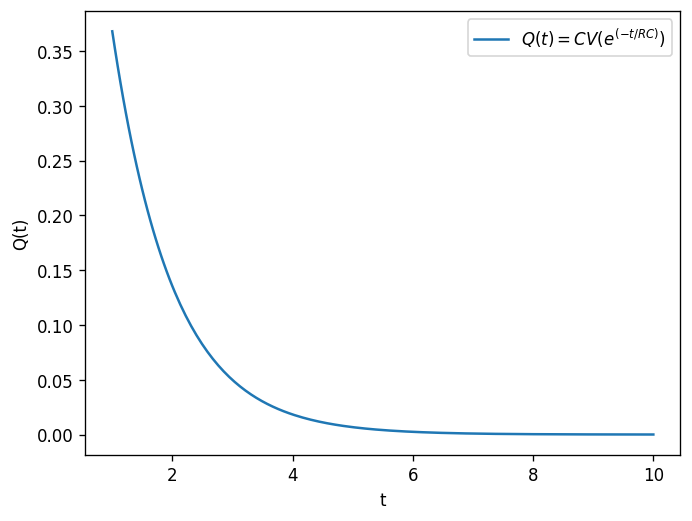

In [32]:
def dischargeCapacitor(R,C,V,t):
    charge = C*V*(np.exp(-(t/(R*C))))

    return (charge)

t = np.linspace(1,10,200)

qQ = dischargeCapacitor(1,1,1,t)

plt.figure(dpi=120)

plt.plot(t,qQ, label='$Q(t) = CV(e^{(-t/RC)})$')
# plt.axhline(y=1, color='green', label='CV, Limit when t goes to infinity')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.legend()

## 14. A pond containing 1,000,000 gal of water is initially free of a certain undesirable chemical (see Problem 17 of Section 1.1). Water containing $0.01~\textrm{g/gal} of the chemical flows into the pond at a rate of 300 gal/h, and water also flows out of the pond at the same rate. Assume that the chemical is uniformly distributed throughout the pond.

### a. Let $Q(t)$ be the amount of the chemical in the pond at time t. Write down an initial value problem for $Q(t)$.

The differential equation for this problem will be

$$\dfrac{dQ}{dt} = Q_{in} - Q_{out} $$

$Q_{in} = 300~\left[\frac{gal}{h}\right] \cdot 0.01~\left[\frac{g}{h}\right] = 3~\left[\frac{g}{h} \right] $

$Q_{out} = \frac{Q}{10^6}~\left[\frac{g}{gal}\right] \cdot 300~\left[\frac{gal}{h}\right] = 3\times 10^{-4} Q~\left[\frac{g}{h} \right] $

The initial value problem will be

$$\dfrac{dQ}{dt} = 3(1-10^{-4}Q) $$

***

### b. Solve the problem in part a for $Q(t)$. How much chemical is in the pond after $1$ year?

Lets solve the equation and find how much chemical will be in the pond

$$\dfrac{dQ}{dt} = 3(1-10^{-4}Q) $$


$$\dfrac{dQ}{dt} = -3\times 10^{-4} (Q - 10^4) $$

$$\dfrac{dQ}{(Q - 10^4)} = -3\times 10^{-4} dt $$

Integrating both sides

$$\ln|Q - 10^4| = -3\times 10^{-4} t + C $$

$$ Q - 10^4 = ce^{-3\times 10^{-4} t} $$

$$ Q(t)  = 10^4 + ce^{-3\times 10^{-4} t} $$

Since Q(0) = 0,

$$ Q(0)  = 10^4 + c = 0 $$

$$ c = =10^{4} $$

$$ Q(t)  = 10^4 - 10^{4}e^{-3\times 10^{-4} t} $$

$$\therefore$$

$$ Q(t)  = 10^4 (1 - e^{-3\times 10^{-4} t}) $$

We have t in hours, $1~\textrm{year}  = 24\times365 =  8760~\textrm{hours} $

$$ Q(8760) = 10^4 (1 - e^{-3\times 10^{-4} 8760}) \approx  9277.77~\textrm{g}$$

***

### c. At the end of 1 year the source of the chemical in the pond is removed; thereafter pure water flows into the pond, and the mixture flows out at the same rate as before. Write down the initial value problem that describes this new situation.

$$\dfrac{dQ}{dt} = Q_{in} - Q_{out} $$

Here, we don't have the incoming, so $ Q_{in} = 0$

$$\dfrac{dQ}{dt} = -Q_{out} $$

$$\dfrac{dQ}{dt} = -3\times 10^{-4} Q $$

***

### d. Solve the initial value problem in part c. How much chemical remains in the pond after 1 additional year (2 years from the beginning of the problem)?

After one year, the quantity in the pound is $9277.77~\textrm{g}$, in one more year, we have

$$\dfrac{dQ}{dt} = -3\times 10^{-4} Q $$

$$\dfrac{dQ}{Q} = -3\times 10^{-4} dt $$

$$ \ln~Q = -3\times 10^{-4} t + C $$

$$ Q(t) = ce^{-3\times 10^{-4} t} $$

At $t=0$, $Q(0) = 9277.77~\textrm{g}$,

$$ Q(0) = ce^{-3\times 10^{-4} (0)} = 9277.77 \to c = 9277.77$$

$$ Q(t) = 9277.77e^{-3\times 10^{-4} t} $$

After one more year, $8760~\textrm{days}$, we have:

$$ Q(8760) = 9277.77e^{-3\times 10^{-4} 8760} \approx 670.07~\textrm{g} $$

***

### e. How long does it take for $Q(t)$ to be reduced to $10~\textrm{g}?

$$ 10 = 9277.77e^{-3\times 10^{-4}t} $$

$$ \frac{1}{927.777} = e^{-3\times 10^{-4}t} $$

$$ \ln~\frac{1}{927.777} = -3\times 10^{-4}t $$

$$ \ln~1 - \ln~927.777 = -3\times 10^{-4}t $$

$$ t = \frac{\ln~927.777}{-3\times 10^{-4}} \approx 22776~\textrm{hour} \approx 2.6~\textrm{year}$$

***

### f. Plot $Q(t)$ versus $t$ for $3$ years.

Text(0, 0.5, 'Q(t)')

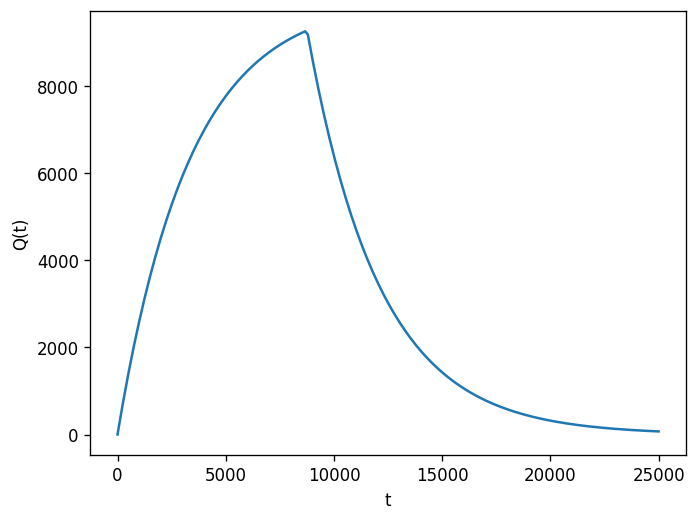

In [33]:
def quantityPond(t):
    def eq1(t):
        return  (10**4)*(1-np.exp(-3e-4*t))
    def eq2(t):
        return  eq1(8760)*np.exp(-3e-4*(t-8760))
    
    qQ = np.zeros(len(t))
    for i in range(len(t)):
        if t[i] <= 8760:
            qQ[i] = eq1(t[i])
        elif t[i] > 8760:
            qQ[i] = eq2(t[i])


    return qQ

t = np.linspace(0,25000,200)

qQ = quantityPond(t)

plt.figure(dpi=120)

plt.plot(t,qQ)
# plt.axhline(y=1, color='green', label='CV, Limit when t goes to infinity')
plt.xlabel('t')
plt.ylabel('Q(t)')
# plt.legend()

In [34]:
s = np.log(927.777)
dd = 3e-4
(s/dd) /365 / 24

2.59999672838089

***

# 1.3 Classification of Differential Equations

* Ordinary Diff Equations $\rightarrow$  Only ordinary derivatives appears, the funcions dependes on a single independent variable
* Partial differential equations $\rightarrow$ the derivatives are partial derivatives, depends on more than one variable

#### Order
* The order of a equation is defined by the highest derivative in the equation.

***
# Problems

# In each of Problems 1 through 4, determine the order of the given differential equation; also state whether the equation is linear or nonlinear.

## 1. $ t^2 \dfrac{d^2y}{dt^2} + \dfrac{dt}{dy} + 2y = \sin{t}$  

It is an linear equation of second order.

***
## 2. $ (1+y^2)\dfrac{d^2y}{dt^2} + t\dfrac{dy}{dt} = y = e^t $

Second order nonlinear equation

***

## 3. $ \dfrac{d^4y}{dt^4} + \dfrac{d^3y}{dt^3} + \dfrac{d^2y}{dt^2} + \dfrac{dy}{dt} + y = 1 $

Fourth order linear equation

***

## 4. $\dfrac{d^2y}{dt^2} + \sin{(t+y)} = \sin{t} $

Second order nonlinear equation

***



# In each of Problems $5$ through $10$, verify that each given function is a solution of the differential equation.
***

# 5. $y'' - y = 0$ ; $y_1(t) = e^t$ ; $y_2(t) = \textrm{cosh}t$

***
To solve that, one way to go is take the first and second derivative of both $y_1$ and $y_2$ with respect to $t$:

$$ y'_1 = e^t \ ; y''_1 = e^t$$

$$ y'_2 = \textrm{sinh}t \ ; y''_2 = \textrm{cosh}t $$

$$ \therefore$$

$$ y''_1 - y_1 = 0$$

$$ y''_2 - y_2 = 0$$

$y_1$ and $y_2$ are solution of the equation

***

# 6. $y'' + 2y' - 3y = 0$ ;   $y_1(t) = e^{-3t}$ ; $y_2(t) = e^t$

***
$$ y'_1 = -3e^{-3t} \ ; y''_1 = 9e^{-3t}$$

$$ y'_2 = e^t \ ; y''_2 = e^t $$

$$ \therefore$$

$$ y''_1 + 2y'_1 - 3y_1 = 9e^{-3t} -6e^{-3t} -3e^{-3t} =  0$$

$$ y''_2 + 2y'_2 - 3y_2 = e^{t} +2e^{t} -3e^{t} =  0$$

$y_1$ and $y_2$ are solution of the equation


***

# 7. $ty' − y =t^2$; $y=3t+t^2$

We have $y' = \dfrac{d(3t+t^2)}{dt} = 3 + t$

Now we need to verify if:

$$ t(3+2t) - (3t+t^2) \stackrel{?}{=} t^2 $$ 

$$ 3t + 2t^2 - 3t - t^2 \stackrel{?}{=} t^2$$

$$ \therefore $$

$$ t^2 = t^2 $$

We can see that $y$ is solution of the equation.

***

# 8. $y'''' + 4y''' + 3y = t$; $y_1(t) = t/3$ ; $y_2(t) = e^{-t} + t/3$

First lets take the derivatives of $y_1$ and $y_2$.


$$ y_1' = \dfrac{d (t3^{-1})}{dt} = \frac{1}{3} $$

$$ y_1'' = y_1''' = y_1'''' = 0 $$

Now for $y_2$:

$$ y_2' = \dfrac{d(e^{-t} + t/3)} {dt}= -e^{-t} + \frac{1}{3} $$

$$ y_2'' = \dfrac{d\left(-e^{-t} + \frac{1}{3}  \right)}{dt}  = e^{-t} $$

$$ y_2''' = -e^{-t} $$

$$ y_2'''' = e^{-t} $$



Now we need to verify:

$$y'''' + 4y''' + 3y \stackrel{?}{=}t$$

replacing $y_1$

$$ 0 + 0 + 3 \frac{1}{3} \stackrel{?}{=} t $$

$$ t = t$$

Now for $y_2$:

$$ e^{-t} - 4e^{-t} + 3(e^{-t} +t/3) \stackrel{?}{=} t $$

$$ -3e^{-t} + 3e^{-t} + 3 \frac{1}{3} \stackrel{?}{=} t $$

$$ t = t $$


$$\therefore$$

$y_1$ and $y_2$ are solution of the equation.


# In each of Problems $11$ through $13$, determine the values of $r$ for which the given differential equation has solutions of the form $y = e^{rt}$.
***

# 